# US Homicide Report 
Erik Hren, Christoper Nyilas, Kyle Sampson, Romel Maldonado - December 2019

<center><img src="Crime_scene_picture.jpg"></center>
<center>“Nobody owns life, but anyone who can pick up a frying pan owns death.” - William S. Burroughs</center>

### Author's Foreword
It is hard to talk about this subject. It is for exactly that reason we decided to tackle it and learn from it. Even though this is an analytical report, it is good to note that all of these crimes (that should not happen) have a sometimes complex story behind it, for which our analysis cannot incorparete. So, let's get started shall we.  

## Objectives:
The goal of this report is to learn in detail about the history of US homocides and its trends. Later on the report will focus on 1 district, Hartford County, CT.

The report aims to answer the following:
- How is the homicide data correlated?
- Are there more perpetrators than victims?
- What is the most common weapon used in homicides?
- What relationship result in most murders from 1980-2014?
- What victim relationship result in most murders from 1980-2014?
- What relationship group has the most homicides?
- Perpetrator and victim sex distribution for each race?
- What is the age group distribution for each race?
- What perpetrator and victim race has the highest homicide incidences?
- What age group is the most predominent for perpetrators and victims?
- Has the age distribution changed over the years?
- What ages encompass the most perpetrators? 
- What states have the lowest homicide rate in 2014?
- What states have the highest homicide rate in 2014?
- What states have the lowest number of incidences from 1980-2014?
- What states have the highest number of incidences from 1980-2014?
- Has the homocide rate decreased from 1980-2014?
- What events caused homicide rates to decrease?
- Can we predict whether the crime will be solved or unsolved for victims?

### Report Steps
This report consists of 4 major parts:
1. Data Exploration
    - Overview and understanding of the data
    - Finding Errors
2. Data Cleaning
    - Clean the data and prepare it for viziulization
    - Expect an extensive cleaning operation
3. Subsetting & viziulization
    - For the US  
4. Decision Trees
    - Encode data
    - Decision tree model
4. Application to a specific scenario
    - Analysis of homicide data for Hartford, Connecticut
    - Hartford Police and education department competing for a fictional $1,000,000 grant to reduce its homicide rate 



# 1. Data Exploration

In [3]:
# Importing libraries 
# importing libraries

import pandas as pd # importing, data manipulation, subsetting
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

In [4]:
# reading in the csv file 
data = pd.read_csv("US HOMOCIDE REPORT.csv")

data.head()

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [5]:
# Data inspection
# Most of the data is categorical 
# from our output and warning we see that "Perpetrator Age" column is considered and object while it should be an integer
# no-null values found yet 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [6]:
# Looking into perpetrator age 
# notice strings, spaces and too small ages for perpetrators 
data['Perpetrator Age'].unique()

array([15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84,
       85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, '22', '52',
       '21', '0', '25', '61', '32', '28', '20', '38', '18', '17', '53',
       '30', '24', '84', '43', '16', '47', '54', '50', '42', '23', '36',
       '35', '60', '27', '19', '14', '57', '63', '81', '31', '58', '51',
       '15', '40', '33', '26', '41', '29', '34', '37', '69', '44', '48',
       '55', '49', '56', '39', '45', '65', '59', '70', '46', '11', '77',
       '67', '76', '85', '72', '13', '89', '74', '71', '64', '62', '3',
       '80', '73', '75', '83', '78', '68', '66', '86', '87', '95', '90',
       '6', '12', '99', '88', '9', '93', '10', 

In [7]:
# Count the values for each unique age
# notice a lot of 0 values 
data['Perpetrator Age'].value_counts()

0     211079
20     21158
19     19807
21     18509
18     18477
       ...  
93         1
89         1
95         1
1          1
92         1
Name: Perpetrator Age, Length: 191, dtype: int64

In [8]:
# Is the unsolved crime connected to some values 
data[data["Crime Solved"]=="No"].count()

Record ID                190282
Agency Code              190282
Agency Name              190282
Agency Type              190282
City                     190282
State                    190282
Year                     190282
Month                    190282
Incident                 190282
Crime Type               190282
Crime Solved             190282
Victim Sex               190282
Victim Age               190282
Victim Race              190282
Victim Ethnicity         190282
Perpetrator Sex          190282
Perpetrator Age          190282
Perpetrator Race         190282
Perpetrator Ethnicity    190282
Relationship             190282
Weapon                   190282
Victim Count             190282
Perpetrator Count        190282
Record Source            190282
dtype: int64

In [9]:
# Are unsolved crimes and 0 values for ages connected 
# almost all of the crimes that are not solved are market with 0 for the perpetrator age
data[(data["Crime Solved"]=="No") & (data["Perpetrator Age"]==0)].count()

Record ID                184980
Agency Code              184980
Agency Name              184980
Agency Type              184980
City                     184980
State                    184980
Year                     184980
Month                    184980
Incident                 184980
Crime Type               184980
Crime Solved             184980
Victim Sex               184980
Victim Age               184980
Victim Race              184980
Victim Ethnicity         184980
Perpetrator Sex          184980
Perpetrator Age          184980
Perpetrator Race         184980
Perpetrator Ethnicity    184980
Relationship             184980
Weapon                   184980
Victim Count             184980
Perpetrator Count        184980
Record Source            184980
dtype: int64

In [10]:
# There clearly is a pattern here
data[(data["Crime Solved"]=="No") & (data["Perpetrator Ethnicity"]=='Unknown')].count()

Record ID                190036
Agency Code              190036
Agency Name              190036
Agency Type              190036
City                     190036
State                    190036
Year                     190036
Month                    190036
Incident                 190036
Crime Type               190036
Crime Solved             190036
Victim Sex               190036
Victim Age               190036
Victim Race              190036
Victim Ethnicity         190036
Perpetrator Sex          190036
Perpetrator Age          190036
Perpetrator Race         190036
Perpetrator Ethnicity    190036
Relationship             190036
Weapon                   190036
Victim Count             190036
Perpetrator Count        190036
Record Source            190036
dtype: int64

In [11]:
# Looking for mistakes in victim age - unique values
# notice 998
data['Victim Age'].unique()

array([ 14,  43,  30,  42,  99,  32,  38,  36,  20,  48,  31,  16,  33,
        27,  21,  60,  40,  18,   8,  25,  24,  46,  23,  22,  45,  26,
        58,  17,  29,  41,  68,  13,  35,  44,  54,  37,  51,  90,  50,
        52,  61,  63,  19,  28,  70,  72,  74,  53,  57,  76,  79,  69,
        34,  66,  55,  67,  65,  47,   1,  49,  62,  75,  56,  59,  78,
        39,  15,   0,  71,  77,   2,   4,  64,  82,  85,   6,   5,   7,
         9,  84,  10,  86,  11,  73,  83, 998,  81,  87,  80,   3,  12,
        94,  93,  92,  89,  97,  88,  91,  95,  98,  96])

In [12]:
# Count the values for each unique age
# here we do not see a lot of 0 values (more known values)
data['Victim Age'].value_counts()

22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: Victim Age, Length: 101, dtype: int64

In [13]:
# There clearly is a pattern here as well 
data[(data["Crime Solved"]=="No") & (data["Victim Ethnicity"]=='Unknown')].count()

Record ID                113271
Agency Code              113271
Agency Name              113271
Agency Type              113271
City                     113271
State                    113271
Year                     113271
Month                    113271
Incident                 113271
Crime Type               113271
Crime Solved             113271
Victim Sex               113271
Victim Age               113271
Victim Race              113271
Victim Ethnicity         113271
Perpetrator Sex          113271
Perpetrator Age          113271
Perpetrator Race         113271
Perpetrator Ethnicity    113271
Relationship             113271
Weapon                   113271
Victim Count             113271
Perpetrator Count        113271
Record Source            113271
dtype: int64

In [14]:
# Are unsolved crimes and 0 values for ages connected 
# almost all of the crimes that are not solved are market with 0 for the perpetrator age
data[(data["Crime Solved"]=="No") & (data["Relationship"]=='Unknown')].count()

Record ID                178121
Agency Code              178121
Agency Name              178121
Agency Type              178121
City                     178121
State                    178121
Year                     178121
Month                    178121
Incident                 178121
Crime Type               178121
Crime Solved             178121
Victim Sex               178121
Victim Age               178121
Victim Race              178121
Victim Ethnicity         178121
Perpetrator Sex          178121
Perpetrator Age          178121
Perpetrator Race         178121
Perpetrator Ethnicity    178121
Relationship             178121
Weapon                   178121
Victim Count             178121
Perpetrator Count        178121
Record Source            178121
dtype: int64

In [15]:
# Unique values for perpetrator count
data['Perpetrator Count'].unique()

array([ 0,  1,  2,  3,  4,  5,  8, 10,  6,  9,  7])

In [16]:
data[(data["Crime Solved"]=="No") & (data["Perpetrator Count"]==0)].count()

Record ID                184069
Agency Code              184069
Agency Name              184069
Agency Type              184069
City                     184069
State                    184069
Year                     184069
Month                    184069
Incident                 184069
Crime Type               184069
Crime Solved             184069
Victim Sex               184069
Victim Age               184069
Victim Race              184069
Victim Ethnicity         184069
Perpetrator Sex          184069
Perpetrator Age          184069
Perpetrator Race         184069
Perpetrator Ethnicity    184069
Relationship             184069
Weapon                   184069
Victim Count             184069
Perpetrator Count        184069
Record Source            184069
dtype: int64

In [17]:
# Unique values for perpetrator count
data['Victim Count'].unique()

array([ 0,  2,  1,  3,  6,  4,  5,  9,  7,  8, 10])

Here we take a look of how many unique states there are in the dataset. There is supposed to be only 50 so, let's take a closer look.

In [18]:
len(data['State'].unique())

51

District of Columbia is not a state. Although, it might be viable to keep it if it has enough data. 

In [19]:
data['State'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'Nebraska', 'North Carolina',
       'North Dakota', 'New Hampshire', 'New Jersey', 'New Mexico',
       'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhodes Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

District of Columbia has a significant amount of observations so, we decided to treat it as a state.

In [20]:
data[data['State']=='District of Columbia'].count()

Record ID                7115
Agency Code              7115
Agency Name              7115
Agency Type              7115
City                     7115
State                    7115
Year                     7115
Month                    7115
Incident                 7115
Crime Type               7115
Crime Solved             7115
Victim Sex               7115
Victim Age               7115
Victim Race              7115
Victim Ethnicity         7115
Perpetrator Sex          7115
Perpetrator Age          7115
Perpetrator Race         7115
Perpetrator Ethnicity    7115
Relationship             7115
Weapon                   7115
Victim Count             7115
Perpetrator Count        7115
Record Source            7115
dtype: int64

In [21]:
# no null values found
# that does not mean there are no mistakes 
data.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

.describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
Here we see that mean victim age is 35. Moreover, we spot the error for its max value of 998. 75% of the data is for the victims below the age of 42.

In [22]:
data.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


### Display data nullness
   Convert the unknown data to NaN for display

In [23]:
# Make a copy as we only wish to show not alter the data
nunality = data.copy()

# Subset the unknown data and convert it to nan numpy type
vic_age_limit = nunality["Victim Age"] > 99
data["Victim Age"][vic_age_limit] = np.nan

perp_age_null = nunality['Perpetrator Age'] == 0 
nunality["Perpetrator Age"][perp_age_null] = np.nan

vic_sex_null = nunality['Victim Sex'] == 'Unknown' 
nunality["Victim Sex"][vic_sex_null] = np.nan

vic_Race_null = nunality['Victim Race'] == 'Unknown' 
nunality["Victim Race"][vic_Race_null] = np.nan

vic_Ethnicity_null = nunality['Victim Ethnicity'] == 'Unknown' 
nunality["Victim Ethnicity"][vic_Ethnicity_null] = np.nan

perp_sex_null = nunality['Perpetrator Sex'] == 'Unknown' 
nunality["Perpetrator Sex"][perp_sex_null] = np.nan

perp_Race_null = nunality['Perpetrator Race'] == 'Unknown' 
nunality["Perpetrator Race"][perp_Race_null] = np.nan

perp_Ethnicity_null = nunality['Perpetrator Ethnicity'] == 'Unknown' 
nunality["Perpetrator Ethnicity"][perp_Ethnicity_null] = np.nan

relationship_null = nunality['Relationship'] == 'Unknown' 
nunality['Relationship'][relationship_null] = np.nan

weapon_null = nunality['Weapon'] == 'Unknown' 
nunality['Weapon'][weapon_null] = np.nan

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/tljh/user/lib/python3.6/site-packages/ipyker

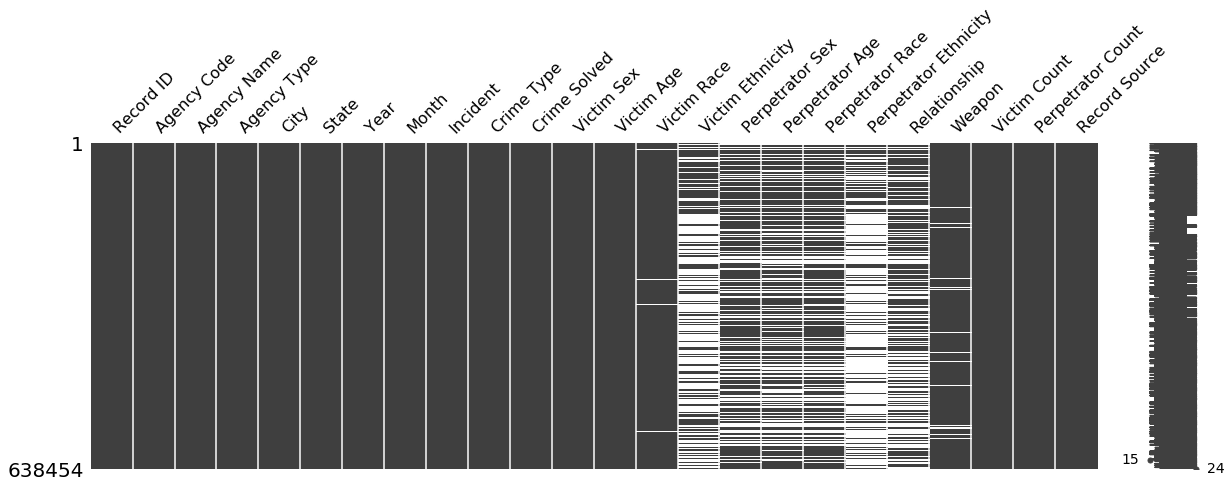

In [24]:
# plot the matrix for null values
mno.matrix(nunality, figsize = (20, 6))

### Percentage of missing data
Display how much data is missing as a percentage

In [25]:
nunality_check = nunality.isna().sum()
nunality_pct = nunality_check/len(nunality)
nunality_pct_times = nunality_pct * 100
nunality_pct_times

Record ID                 0.000000
Agency Code               0.000000
Agency Name               0.000000
Agency Type               0.000000
City                      0.000000
State                     0.000000
Year                      0.000000
Month                     0.000000
Incident                  0.000000
Crime Type                0.000000
Crime Solved              0.000000
Victim Sex                0.154122
Victim Age                0.000000
Victim Race               1.045651
Victim Ethnicity         57.686693
Perpetrator Sex          29.816557
Perpetrator Age          33.060957
Perpetrator Race         30.706519
Perpetrator Ethnicity    69.920464
Relationship             42.761577
Weapon                    5.198808
Victim Count              0.000000
Perpetrator Count         0.000000
Record Source             0.000000
dtype: float64

## Findings & Assumptions

1. Most of the data types are object
2. We saw that most uknown or zero values correspond to unsolved crimes 
3. Most unknown values correspond to the perpetrator, ethnicity for both, perpetrator and victim count and relationship features 
    - For the perpetrator it makes sense becasue if you do not know who is the criminal you cannot describe him/her
4. FBI left more than 50% of ethnicity information blank 
5. Perpetrator age column contains very young ages (i.e. 1,2,3...)
    - The youngest person convicted of a murder was 6 years old
6. Victim age does not contain many 0 values 
    - it is possible for a victim to be an infant 
6. The maximum victim age is 998 (many same values)

## Going Forward - Data Cleaning

1. Visualize the amount of missing values with percentage and a chart 
2. Perpetrator age
    - Replace spaces as 0 
    - Drop all ages below 6 
    - Convert the data type to integer
    - Fill the missing values with regression as its information will be useful even though we are introducing an error
        - age data is useful and it is worth the trade off sometimes (i.e. famous titanic dataset)
3. Victim Age
    - Drop the 998 age value
4. Perpetrator and Victim Count 
    - Fill the missing values with regression
4. Ethnicity
    - Drop both ethnicity columns (too many missing data and we did not find it useful)
5. Other unknown values
    - We decided not to drop or impute other unknown values and treat them as a seperate category as it would be a tiring
    process because they are an object data type. 
    - However, if you so wish you can use mode or encode and fill the data. 

# 2. Data Cleaning
    - To goal here is to clean and prepare the data per the findings and assumptions we made above

Replace all the blanks with 0 values and convert strings into integers. We want all missing data for ages to be 0 so, we can convert them to NaN dtype. Then we can simply fill the missing data with the method of our choosing. 

In [26]:
# make a copy of the original data to keep it safe
data2 = data.copy()

# replace blank strings with zeros
data2['Perpetrator Age'] = data2['Perpetrator Age'].replace(" ", 0)

# convert to integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(str).astype(int)

# See if the spaces are gone and that if strings became integers
data2['Perpetrator Age'].unique()

array([15, 42,  0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25,  7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80,  9, 12, 81,  6, 87, 82, 83,  8, 84,
       85, 86,  5,  3,  1, 88, 95,  4, 91, 92, 96, 94,  2, 98, 97])

Subset the data for all the perpetrator ages below zero and convert them to NaN dtype. Age 6 was picked because the youngest homicide perpetrator in history was 6 years old.

In [27]:
# replacing perpetrators under the age 6 with NAN

# search for ages below 6
# This returns True/False
under_6 = data2["Perpetrator Age"] < 6

# replace them with nan values for that column
data2["Perpetrator Age"][under_6] = np.nan

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Remove the error values from victim age. To our knowledge nobody could be that old.

In [28]:
# subset the age 998
vic_age_limit = data2["Victim Age"] == 998

# replace them with nan values for that column
data2["Victim Age"][vic_age_limit] = np.nan

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Interpolate missing values (Victim, Perpetrator age)
    - Interpolate method makes a mean between the values before the missing data and the value after
    - Linear parameter is set as default to interpolate the missing values

In [29]:
# interapolate missing data
data2 = data2.interpolate()

# display first 5 rows
data2.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,42.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,39.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Before we converted subsets to numpy NaN. This transformed the data series into a data type float. Now, we have to convert the age values back into integers. 

In [30]:
# Convert the column type to integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(int)
data2['Victim Age'] = data2['Victim Age'].astype(int)

# Check if the data is converted 
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null int64
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    63845

## Perpetrator & Victim count - fill missing values
    - Victim and perpetrator count 0 values correlate with crimes that were unsolved. 
    - Hence, we regard these 0 zero values as unknown values as before. 
    - Here we will subset the zero values and convert them to numpy NaN
    - Calculate the mean that now does not include 0, and use it to fill the NaN values
    - .fillna() method is very useful for that 
        - There are other methods to choose how to fill the NaN values such as backward, forward fill etc. 

In [31]:
# subset the age 998
pepr_count = data2["Perpetrator Count"] == 0

# replace them with nan values for that column
data2["Perpetrator Count"][pepr_count] = np.nan

# subset the age 998
vic_count = data2["Victim Count"] == 0

# replace them with nan values for that column
data2["Victim Count"][vic_count] = np.nan

# Mean of perpetrator and victim count
# Its 1 for both
perp_mean = data2["Perpetrator Count"].mean()
vic_mean = data2["Victim Count"].mean()

# Fill missing values with the mean
data2["Perpetrator Count"] = data2["Perpetrator Count"].fillna(perp_mean).round()
data2["Victim Count"] = data2["Victim Count"].fillna(vic_mean).round()

# Convert from float to integer
data2["Perpetrator Count"] = data2["Perpetrator Count"].astype(int)
data2["Victim Count"] = data2["Victim Count"].astype(int)

data2.info()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null int64
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    63845

### Drop Ethnicity Columns
    - Why? The ethnicity data is categorical and more than 60% of the data is missing 
    - Moreover, during our analysis we did not find it particulary useful as it only has 2 data point options 
        (hispanic, not hispanic)
    - Instead, perpetrator and victim race columns provide much more data and will be used for profiling. 

In [32]:
# Drop the ethnicity column due to too many missing values
data2 = data2.drop(columns=['Perpetrator Ethnicity', 'Victim Ethnicity'])

# check if columns are removed
data2.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Perpetrator Sex',
       'Perpetrator Age', 'Perpetrator Race', 'Relationship', 'Weapon',
       'Victim Count', 'Perpetrator Count', 'Record Source'],
      dtype='object')

### Convert Object to Category dtype
    - While it is not neccessary the object data types will be converted into category datatype
    - Why? It is faster to filter through categorical data

In [33]:
# Shorthand explanation: x /= 3, equivalent to x = x / 3
# select only the object data types
# use the apply function to convert them to a category type
data2.loc[:, data2.dtypes == 'object'] =\
    data2.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 22 columns):
Record ID            638454 non-null int64
Agency Code          638454 non-null category
Agency Name          638454 non-null category
Agency Type          638454 non-null category
City                 638454 non-null category
State                638454 non-null category
Year                 638454 non-null int64
Month                638454 non-null category
Incident             638454 non-null int64
Crime Type           638454 non-null category
Crime Solved         638454 non-null category
Victim Sex           638454 non-null category
Victim Age           638454 non-null int64
Victim Race          638454 non-null category
Perpetrator Sex      638454 non-null category
Perpetrator Age      638454 non-null int64
Perpetrator Race     638454 non-null category
Relationship         638454 non-null category
Weapon               638454 non-null category
Victim Count         638454 no

# 3. Descriptive analysis and Visualization
Now the data is clean and prepared to answer the question. Here there are questions from before that we will tackle:
        1. Time series for homicede incidences 
            - Has the homocide rates decrease from 1980-2014?
            - What events caused homicide rates to increase?
            - What states have the highest and lowest number of incidences from 1980-2014?
            - What states had the highest and lowest murder rate in 2014?
        2. Age distribution
            - What age group is the most predominent for perpetrators and victims?
            - Has the age distribution change over the years?
            - What ages encompass the most perpetrators? 
        3. Race and sex 
            - Perpetrator and victim sex distribution for each race?
            - What is the age group distribution for each race?
            - What perpetrator and victim race has the highest homicide incidences?
        4. Relationship
            - What relationship result in most murders from 1980-2014?
            - What victim relationship result in most murders from 1980-2014?
            - What relationship group has the most homicides?
        5. Weapon
            - What weapons are most and least commonly used for murder over the time period?
        6. Perpetrator and Victim Count
            - Are there more perpetrators than victims?
        7. Correlation
            - How is the homicide data correlated?
        8. Decision Tree
            - Can we predict whether the crime will be solved or unsolved for victims?
        9. How to reduce the crime rate in Hartford, CT?
            - Police and education arguments 

### 1. Time series for homicide incidences

**Has the homocide rate decreased from 1980-2014?**<br>
Yes, quite significantly. 

**What events caused homicide rates to increase?**
In 1985 the market for crack cocaine grew rapidly. "A number of authors have highlighted the extreme patterns in violence that strongly suggest an important role for crack... for instance, presents homicide rates by age and race for the period 1976–2000." The research classify over 25 percent of these homicides as crack-related. Almost all of these homicides involved crack distribution, rather than homicides induced by the psychopharmo- logical effects of crack or the need of drug users to obtain money.

In addition, crime did peak during periods of financial crisis, according to the UNODC report Monitoring the Impact of Economic Crisis on Crime. Data recorded by police in 15 countries on the incidence of robbery, homicide and car theft a link between economic factors and crime could be clearly established in 8 of 11 countries. However, "a consistent relationship between specific crimes and specific economic factors could not be established... The evidence shows that crime is linked to the economic climate."

Source: https://www.unodc.org/unodc/en/frontpage/2012/February/economic-crises-can-trigger-rise-in-crime.html

**What events caused homicide rates to decrease?**<br>
The rates sharply fell in the 1990's due to:

1. **Increased number of police officers**
    - Before the increase the elasticities of crime with respect to the number of police was approximately 􏰁- 0.30
    - The number of police officers increased by 50,000–60,000 officers, or roughly 14 percent, in the 1990s
    - increase in police between 1991 and 2001 can account for a crime reduction of 5–6 percent across the board. 
    - The increase in police can thus explain somewhere between one-fifth and one-tenth of the overall decline in crime.
2. **The rising prison population**
    - By 2000, more than two million individuals were incarcerated at any point in time, roughly four times the number locked up in 1972. 
    - Of that prison population growth, more than half took place in the 1990s. 
    - The increase in prisoners can be attributed to a number of factors:
        - the sharp rise in incarceration for drug-related offenses
        - increased parole revocation 
        - longer sentences for those convicted of crimes
        - increased punishment for lower crimes
     - The threat of punishment became a larger deterent of crime. The increase in incarceration over the 1990s can account for a reduction in homicide crime of approximately 12 percent. 
3. **The receding crack epidemic**
     - There is little to no studies that link the ebbing of the crack epidemic to falling crime. Although the research is limited, we nonetheless believe that crack has quite likely played an important role in the decline in homicide in the 1990s, at least for homicide. 
4. **Legalization of abortion**
    - The importance of legalization of abortion to drop of crime rests on 2 premises:
        - unwanted children are at greater risk for crime
        - legalized abortion leads to a reduction in the number of unwanted births.
    - With respect to the first premise, the negative impact of adverse home environments generally on eventual criminality, the evidence is quite clear (Loeber and Stouthamer-Loeber, 1986; Sampson and Laub, 1993).
    
Source: https://pubs.aeaweb.org/doi/pdf/10.1257/089533004773563485

**Let's examine how we wrote the code.**<br>
The seaborn lineplot marks the beginning of crack epidemic in 1980's until early 1990's (see text above). Moreover, the dot.com financial crisis (2000-2002) and the 2007-2009 financial crisis caused by the housing bubble. 

We used a groupby method that aggregated count of incidences to a given year. When groupby is perfomed the variable that is grouped by (year) is moved into an index column. To have access to the column names we reset the index. There is also a way where reset index is not required. Then we specify how big the lineplot is going to be with plt.figure and plot a seaborn chart specifying the data and what columns to use on the axis (x is categorical, y is numeric). The title is set by using .set_title() method for seaborn. Lastly, we use matplotlib axvspan to highligh the events on the plot. We specify the start and end, color, and alpha to adjust the transparency of the plot.

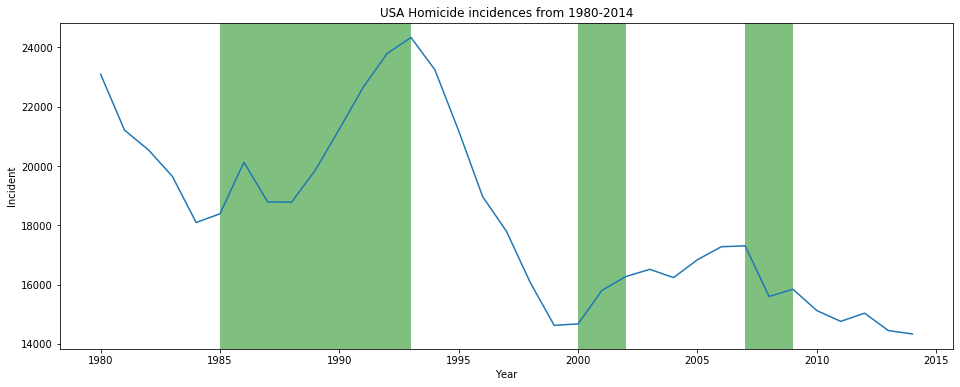

In [34]:
# Group the count of incident by year 
# Reset index for plotting
country_incidences = data2.groupby('Year')['Incident'].agg('count')
country_incidences = country_incidences.reset_index()

# Create a lineplot over for all the years of data
plt.figure(figsize=(16, 6))
sns.lineplot(data=country_incidences, x='Year',y='Incident').set_title("USA Homicide incidences from 1980-2014")

# mark the financial crises on the graph
plt.axvspan(2000,2002,facecolor='g', alpha=0.5)
plt.axvspan(2007,2009,facecolor='g', alpha=0.5)
plt.axvspan(1985,1993,facecolor='g', alpha=0.5)

**Percentage Change of Homicide Incidences** 
Here we calculated the percentage change of incidences from 1980-2014. As per above we see the biggest percentage increase in times of crack epidemic and its decrease in the end. Moreover, the increase of incidences at the start of the dot com financial crisis (end of 1990's). 

**Code:** 
We select two columns that we need to calculate the percentage change (year, incident). Then pct_change() method is used to calculate the percentage change and multiplied with a 100 to turn it into percentage format. The plot is then performed in the same manner per above.

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Percentage Change of USA Homicides during 1980-2014')

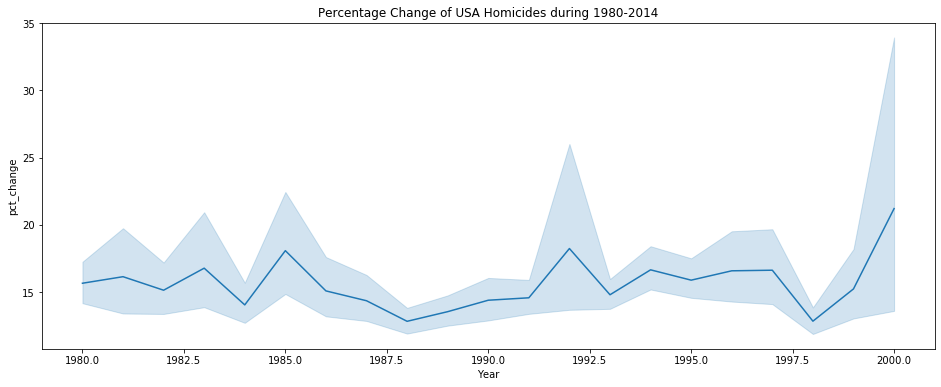

In [35]:
# subset the data we need for the plot (year and incident)
pct_change = data2[['Year','Incident']]

# Create a new column and apply the formula that calculates the pct change and multiply it to create a percentage
pct_change["pct_change"] = pct_change["Incident"].pct_change()*100

# plot and add the tittle 
plt.figure(figsize=(16, 6))
sns.lineplot(x='Year',y='pct_change',data=pct_change).set_title("Percentage Change of USA Homicides during 1980-2014")

**What states have the highest number of incidences from 1980-2014?**

Text(0.5, 1.0, 'Top 20 States with the Highest Number of Homicide Incidences')

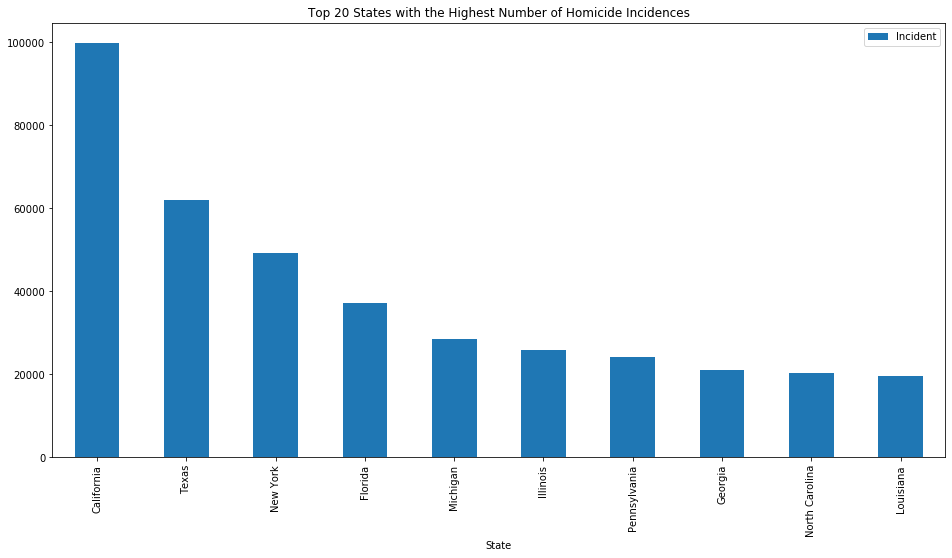

In [36]:
state_inc_years = data2.groupby('State')['Incident'].agg('count')
state_inc_years = state_inc_years.reset_index().sort_values("Incident", ascending = False)
state_inc_years.head(10).plot(x='State',y='Incident',kind='bar',figsize=[16,8])
plt.title("Top 20 States with the Highest Number of Homicide Incidences")

**What states have the lowest number of incidences from 1980-2014?**

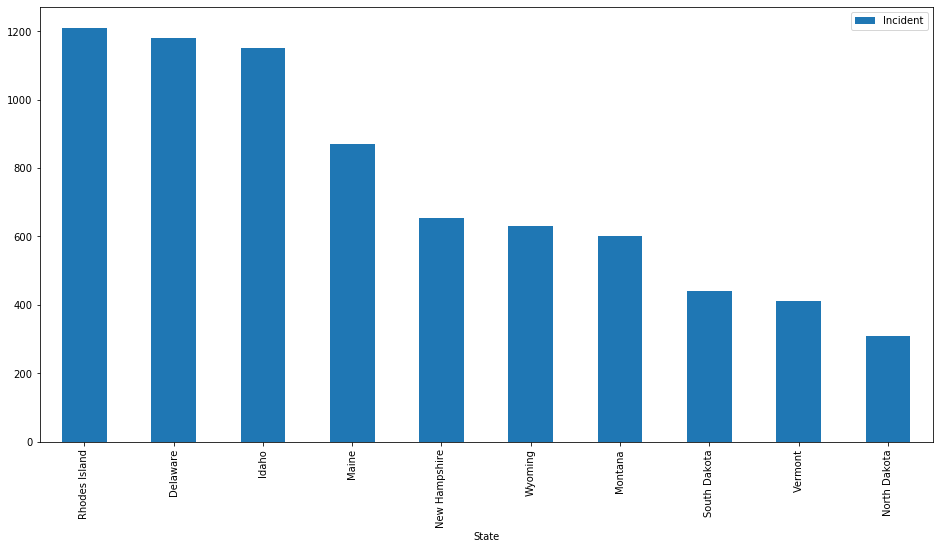

In [37]:
state_inc_years.tail(10).plot(x='State',y='Incident',kind='bar',figsize=[16,8])

**State Murder rate (per 100,000)**<br>
To get the population in 2014 per state we have to read in one more file.<br>
*Note: Data has to be downloaded to your envirionment for it to be read in.*<br>
Source: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html

In [38]:
# Read in the state population data for year 2014
state_pop = pd.read_csv('statepop2014.csv')

In [39]:
# subset the count incident data by state and year (this is multi-index subsetting) and store it in a variable
# reset the index --> get the columns out of index
state_incidences = data2.groupby(['State','Year'])['Incident'].agg('count')
state_incidences = state_incidences.reset_index()

# subset the grouped by data only for the year 2014 and reset the index 
state_incidences_2014 = state_incidences[state_incidences['Year']==2014].reset_index().drop('index',axis=1)

# add a population column to the 2014 state data subset that has the values of the csv file we read in 
# Create a murder per capita column and perform the calculation to get the per capita murder rate (per 100,000)
state_incidences_2014['Population'] = state_pop['Population']
state_incidences_2014['Murder Per Capita'] = ((state_incidences_2014['Incident']/state_incidences_2014['Population']
                                              )*100000).round(2)
# Display first 5 rows 
state_incidences_2014.head()

,State,Year,Incident,Population,Murder Per Capita
0,Alabama,2014,1,4842481,0.02
1,Alaska,2014,48,736307,6.52
2,Arizona,2014,313,6733840,4.65
3,Arkansas,2014,169,2967726,5.69
4,California,2014,1872,38625139,4.85


**What states have the highest homicide rate in 2014?**<br>
*District of Columbia* has the highest murder rate per capita of 17.21. However, these are the record low numbers in decades comparing it to year 1991 where the murder rate was 90.91 per capita. To compare it to other years please see:<br> https://www.macrotrends.net/states/district-of-columbia/murder-homicide-rate-statistics

Although, from our analysis we see that many southern states are concentrated to the top. Crime has long been associated with poverty, and many of America's states with the lowest per capita income are in the South — including Mississippi, West Virginia, Arkansas, Alabama, and Kentucky. Moreover, the summer months have been linked to crime waves in America, as the balmy weather encourages young people to hit the streets. 

Source: https://www.businessinsider.com/south-has-more-violent-crime-fbi-statistics-show-2013-9

Text(0.5, 1.0, '20 States with the Highest Homicide Rate per Capita')

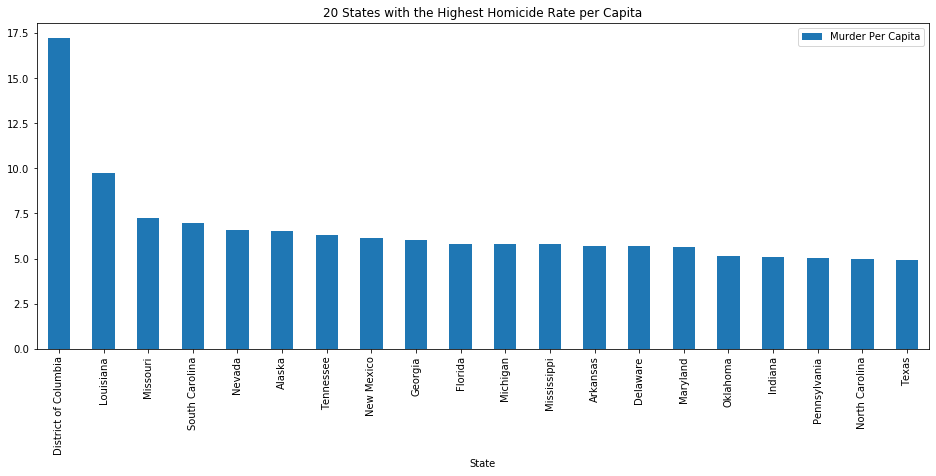

In [40]:
# sort the values from largest to smallest and plot the top 20 murder per capita rates
state_incidences_2014_top10 = state_incidences_2014.sort_values('Murder Per Capita',ascending=False).head(20)
state_incidences_2014_top10.plot(x='State',y='Murder Per Capita',kind='bar',figsize=[16,6])
plt.title('20 States with the Highest Homicide Rate per Capita')

**What states have the lowest homicide rate in 2014?**<br>
The chart shows that Alabama has the lowest homicide rate which has to be an anomaly. The cdc reported 8.1 rate for 2014.
See here: https://www.cdc.gov/nchs/pressroom/states/alabama/alabama.htm

Hawaii has the historically lowest homicide rate of about 1.0 per 100,000. From the analysis North Eastern states have the lowest rates compared to other regions. 

Text(0.5, 1.0, '20 States with the Lowest Homicide Rate per Capita')

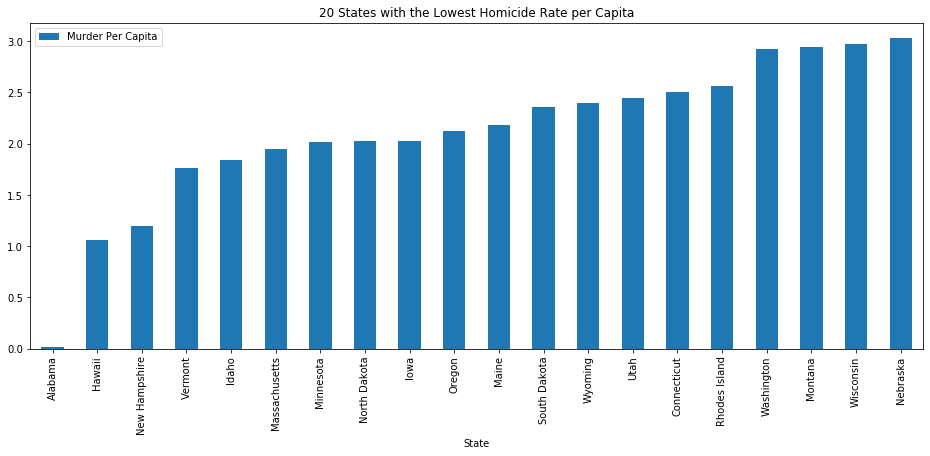

In [41]:
# sort the values from largest to smallest and plot the lowest 20 states per murder rate
least_state_murders = state_incidences_2014.sort_values(by='Murder Per Capita').head(20)
least_state_murders.plot(x='State',y='Murder Per Capita',kind='bar',figsize=[16,6])
plt.title('20 States with the Lowest Homicide Rate per Capita')

### 2. Data distribution
Lets check how the numerical data is distributed. 

Constructing a multi-sublots with seaborn allows us to view large amount of information all at once. Here is what we can see:
    1. There is no particular pattern between the values when looking at the scatterplots 
    2. Perpetrator age data is skewed to the right indicating that many perpetrators are young
    3. Victim age distribution looks almost normal and that victims are usually more older than perpetrators 
    4. The distribution of homocides over the years seems to decline. Most crimes happened in the 1980's.  

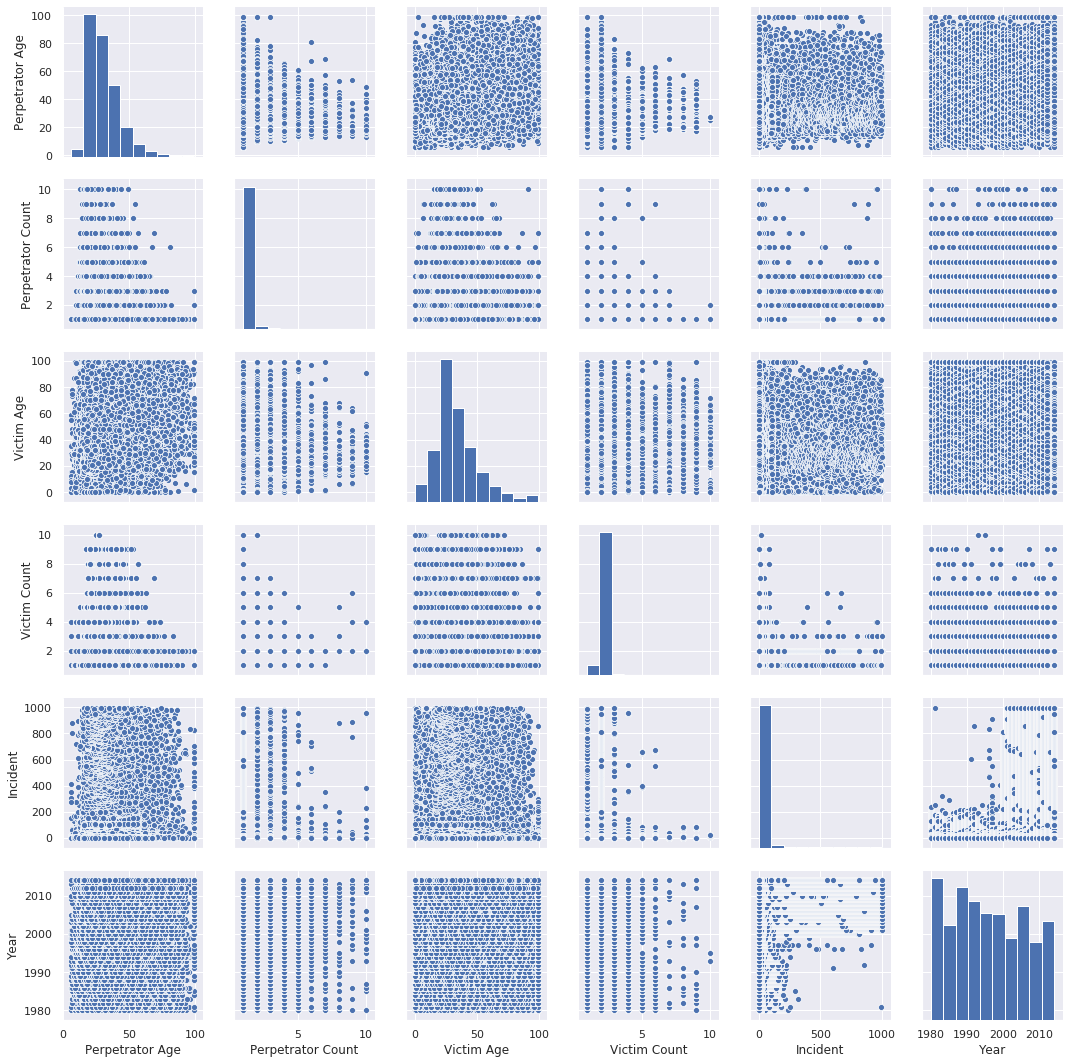

In [42]:
# set space for seaborn subplots
sns.set()
# Select the columns that have the numerical data 

cols = ['Perpetrator Age', 'Perpetrator Count', 'Victim Age', 'Victim Count', 'Incident', 'Year']

# Create a pairplot for the selected columns from the clean dataset 
# adjust the hight of the plots
sns.pairplot(data2[cols], height = 2.5)

# show the plot
plt.show();

**Closer look at the distribution over the years**<br>
We can clearly see the number of homicide incidences decreased over the years. From 1980 to 2014 incidences decreased by approximetely 7,000. That is about 30% decrease. Moreover, we can clearly see the effects of crack epidemic and its decrease in the late 1990's. There is a slight increase in homicide incidences during the periods of the financial crisis. 

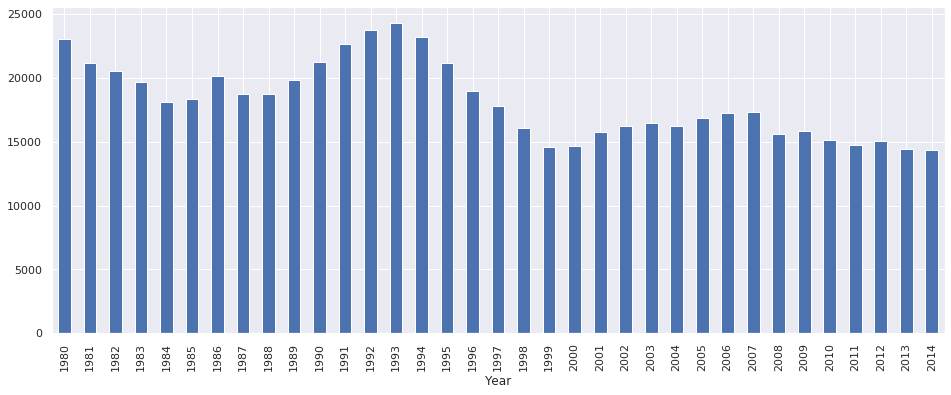

In [43]:
data2.groupby('Year')['Incident'].agg('count').plot(kind='bar',figsize=[16,6])

**Distribution of homicide incidences for the months**<br>
We confirm that most incidences happen in the warmer months, specifically July, and August both near 60,000 as everyone is outside. Moreover, December is 3rd place with approximetly 55,000 incidences over the past 35 years. We assume that is due to the holiday season. The least murders happen in February, November, and April. 

Source: https://www.nytimes.com/2009/06/19/nyregion/19murder.html?mtrref=www.google.com&gwh=B94888DCB6D671995B1212D1ADB75007&gwt=pay&assetType=REGIWALL

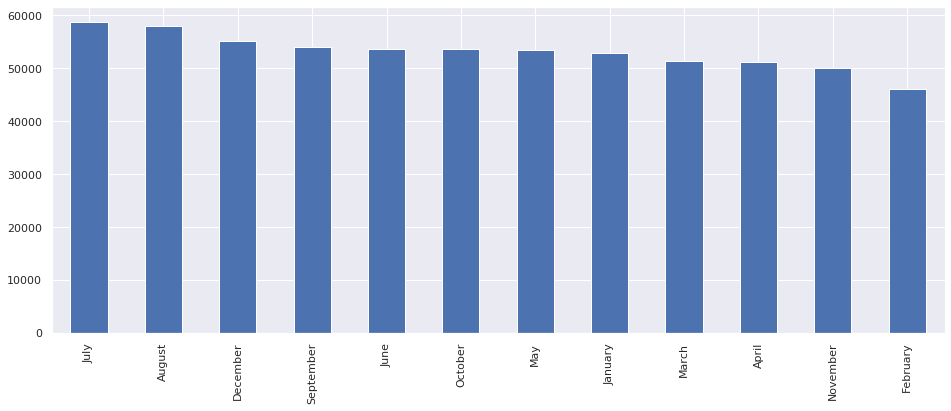

In [44]:
data2['Month'].value_counts().plot(kind='bar',figsize=[16,6])

**What ages encompass the most perpetrators? (see charts below).**<br>
Most of the perpetrators are 18 to about 35 years old. The average is 30 and 75% of the perpetrators are age 36 and younger. The oldest perpetrators are 99 years old. It is good to remember that the data for ages under 6 was filled. The data is skewed to the left. From this we can assume that the older you are the least likely it is that you will commit the murder. After the age of 60 there is almost no observations. Why is that? 

Our assumptions:
- The availability of information on explosives on the Internet
- The breakdown of the nuclear family (rising divorce rates etc.)
- The natural tendency for teens to form groups and cliques
- Healthy teen rebellion getting out of hand
- Domestic violence

These assumptions are based on the CDC report which you can access here:
<https://www.cdc.gov/mmwr/volumes/68/wr/mm6803a1.htm>

**What ages encompass the most victims?**<br>
From the chart we see that infant homicide is high in the US. Homicide accounts for nearly 1 in 5 injury-related deaths among infants (under one year of age). Key risk factors associated with infant homicides include the circumstances surrounding the birth. Important maternal risk factors include an unmarried teenage mother or born into poverty. Studies suggest that male caretakers (fathers or mothers intimate partners), often acting impulsively, are the perpetrators of the majority of infant homicides. Studies have also indicated that a substantial but uncertain number of unreported homicides may occur among very young infants.

Source: https://www.childtrends.org/wp-content/uploads/2016/03/indicator_1457608611.364.html

Furthermore, victims are older than perpetrators. The **most frequent** victim age is 22 compared 20 for perpetrators, and 75% of the data is for the ages 46 and younger.

**Code:** Distplot lets you quickly show a histogram with a line on it. It is a part of seaborn package we import it (used for graphing similar to matplotlib). 

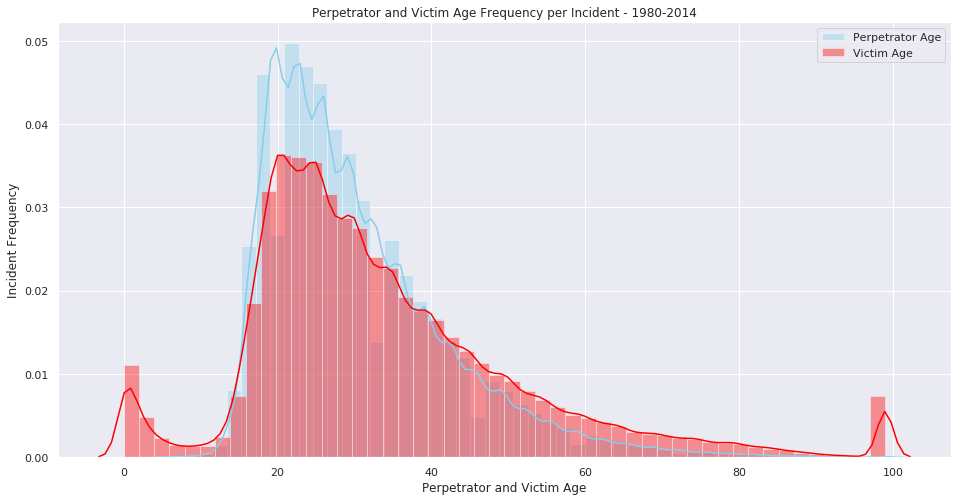

In [45]:
# select the data series to plot, color, and label
# to create 2 plots in one plane simply create 2 displots 
# labels, title and legend are then added using plt (matplotlib)
plt.subplots(figsize=(16, 8))
sns.distplot( data2["Perpetrator Age"] , color="skyblue", label="Perpetrator Age")
sns.distplot( data2["Victim Age"] , color="red", label="Victim Age")
plt.title('Perpetrator and Victim Age Frequency per Incident - 1980-2014')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

**Perpetrator and victim age mode**

In [46]:
data2['Perpetrator Age'].mode()

0    20
dtype: int64

In [47]:
data2['Victim Age'].mode()

0    22
dtype: int64

We can apply **.describe()** to pandas series as well to look at the particular 'column' in a dataframe.

In [48]:
data2['Perpetrator Age'].describe()

count    638454.000000
mean         30.297293
std          11.769614
min           6.000000
25%          22.000000
50%          27.000000
75%          36.000000
max          99.000000
Name: Perpetrator Age, dtype: float64

In [49]:
data2['Victim Age'].describe()

count    638454.000000
mean         33.567297
std          17.790771
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max          99.000000
Name: Victim Age, dtype: float64

**Pie chart - Perpetrator and Victim Age**<br>
Basic matplotlib bar chart lets us see how are the different ages represented for perpetrators and victims. 
Most **perpetrator** data is represented in ages from 18-30 with 20 holding the highest percentage - 5%.
For **victims** the ages are more evenly distributed between 2%-3.6%. We see that ages 20 and below hold less significance to the data.

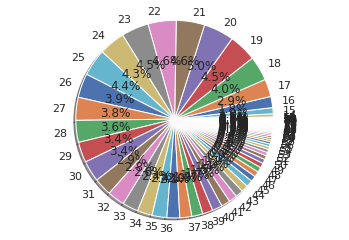

In [50]:
labels = data2['Perpetrator Age'].astype('category').cat.categories.tolist()
counts = data2['Perpetrator Age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

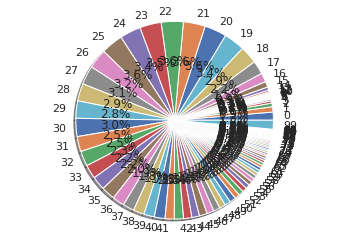

In [51]:
labels = data2['Victim Age'].astype('category').cat.categories.tolist()
counts = data2['Victim Age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

**Has the age distribution change over the years?**<br>
Let's check whether the perpetrator and victim ages has changed over the period of 2 decades.. We will compare the perpetrator and victim age data from 1980-1985 to 2009-2014. 

In [52]:
# subset data for the 1980-1985 years
eighties = data2[data2['Year']<=1985]

# subset data for the 2009-2014 years 
modern = data2[data2["Year"]>=2009] 

**Answer: Yes and No (see charts below)** <br>
From the following charts below we can see that the perpetrators used to be a slightly older than it has been in the period from 2009-2014. 

**Perpetrator age**<br>
For the eighties data subset the mode age is 25 and 75% data is for the ages 37 and younger. For the modern subset the mode age is 21 and 75% of the data is for the ages 38 and younger. The average for both is still 31. Thefore, the perpetrator has decreased signifivantly.

**Victim age**<br>
For the eighties data subset the mode age is also 25, while 75% of the data for the ages 43 and younger. For the modern subset the mode is 22 and 75% of the data if for the ages 44. From this we can see that the most frequent age of victims has decreased however, the whole distribution is older by 1 year. 

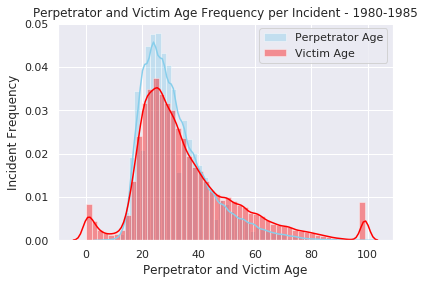

In [53]:
sns.distplot( eighties["Perpetrator Age"] , color="skyblue", label="Perpetrator Age")
sns.distplot( eighties["Victim Age"] , color="red", label="Victim Age")
plt.title('Perpetrator and Victim Age Frequency per Incident - 1980-1985')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

In [54]:
mode_eighties = eighties["Perpetrator Age"].mode()
print("Most frequent perpetrator age for years 1980-1985: ",mode_eighties)

Most frequent perpetrator age for years 1980-1985:  0    25
dtype: int64


In [55]:
mode_eighties_perp = eighties["Victim Age"].mode()
print("Most frequent victim age for years 1980-1985: ",mode_eighties)

Most frequent victim age for years 1980-1985:  0    25
dtype: int64


Distribution of perpetrator age data for 1980-1985:

In [56]:
eighties["Perpetrator Age"].describe()

count    120976.000000
mean         31.306739
std          11.807745
min           6.000000
25%          23.000000
50%          29.000000
75%          37.000000
max          99.000000
Name: Perpetrator Age, dtype: float64

In [57]:
eighties["Victim Age"].describe()

count    120976.000000
mean         35.075676
std          18.234217
min           0.000000
25%          23.000000
50%          31.000000
75%          43.000000
max          99.000000
Name: Victim Age, dtype: float64

Distribution of perpetrator data for 1980-1985 in a distplot:

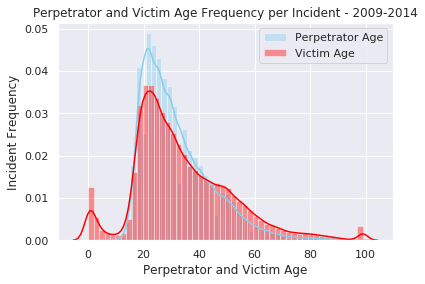

In [58]:
sns.distplot( modern["Perpetrator Age"] , color="skyblue", label="Perpetrator Age")
sns.distplot( modern["Victim Age"] , color="red", label="Victim Age")
plt.title('Perpetrator and Victim Age Frequency per Incident - 2009-2014')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

Mode of perpetrator age data for 2009-2014:

In [59]:
modern["Perpetrator Age"].mode()

0    20
dtype: int64

In [60]:
modern["Victim Age"].mode()

0    22
dtype: int64

Distribution of perpetrator age data for 2009-2014:

In [61]:
modern["Perpetrator Age"].describe()

count    89526.000000
mean        31.762840
std         12.427338
min          6.000000
25%         22.000000
50%         29.000000
75%         38.000000
max         99.000000
Name: Perpetrator Age, dtype: float64

In [62]:
modern["Victim Age"].describe()

count    89526.000000
mean        33.851864
std         17.268654
min          0.000000
25%         22.000000
50%         30.000000
75%         44.000000
max         99.000000
Name: Victim Age, dtype: float64

**Maping peprpetrator and victim ages into groups**<br>
For the following we created a column transformation with a fucntion and applied it to perpetrator age that grouped it into 3 categories:
    - Ages below 21 we marked as child
    - Ages between 21 and 60 as adults
    - Ages above 60 as elder
From these we wanted to see what age group is most predominent for victims and perpetrators.
We created a new copy of the data as we will only use this for transformation purposes. We created a new column name and give it data from Perpetrator age column. Then we used the apply function on the new column with the function we created.

In [63]:
# create a function that will take 1 argument
# if that value (argument) is smaller than 21 return child, if older than 60 return elder, otherwise its adult
def age_group(x):
    if x <21:
        return 'child'
    if x > 60:
        return 'elder'
    else:
        return 'adult'

# Create a copy as we will only use this column for these charts
data3 = data2.copy()
# Create a new column (series) that will have the same data as perpetrator and victim age
data3['Perpetrator_Age_Group'] = data3['Perpetrator Age']
data3['Victim_Age_Group'] = data3['Victim Age']
# apply the function above to the new series 
data3['Perpetrator_Age_Group'] = data3['Perpetrator_Age_Group'].apply(age_group)
data3['Victim_Age_Group'] = data3['Victim_Age_Group'].apply(age_group)
# display first 3 rows
data3.head(3)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Perpetrator_Age_Group,Victim_Age_Group
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,2,1,FBI,child,child
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Male,42,White,Acquaintance,Strangulation,2,1,FBI,adult,adult
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,42,Unknown,Unknown,Unknown,2,1,FBI,adult,adult


**What age group is the most predominent for perpetrators and victims?**<br>
Value counts, counts the number of times the value occurs in the data. From this we see that adults represent the most data points for both perpetrators and victims. This is not suprising since the child group only has the ages 6-20. From the data we see that there are more victims that are elders compared to perpetrators. 

Text(0, 0.5, 'Value Counts')

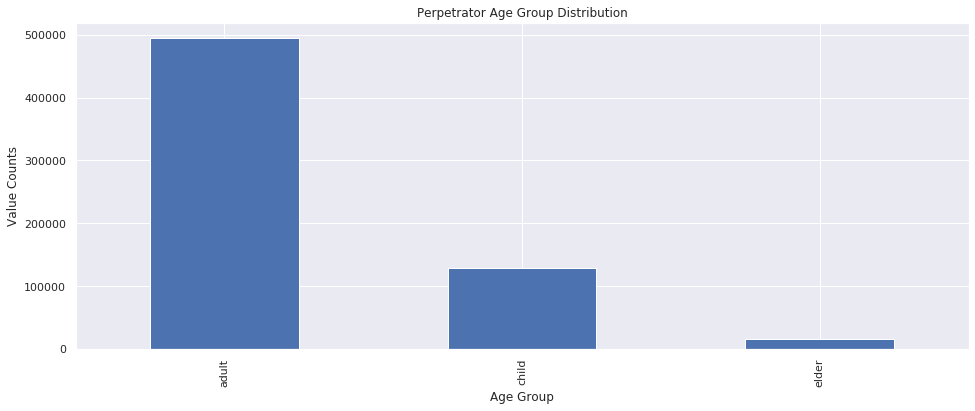

In [64]:
# pick a data frame series, calculate the value counts and plot a bar chart
data3['Perpetrator_Age_Group'].value_counts().plot(kind='bar', figsize=[16,6])
# assign title and labels
plt.title('Perpetrator Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Value Counts')

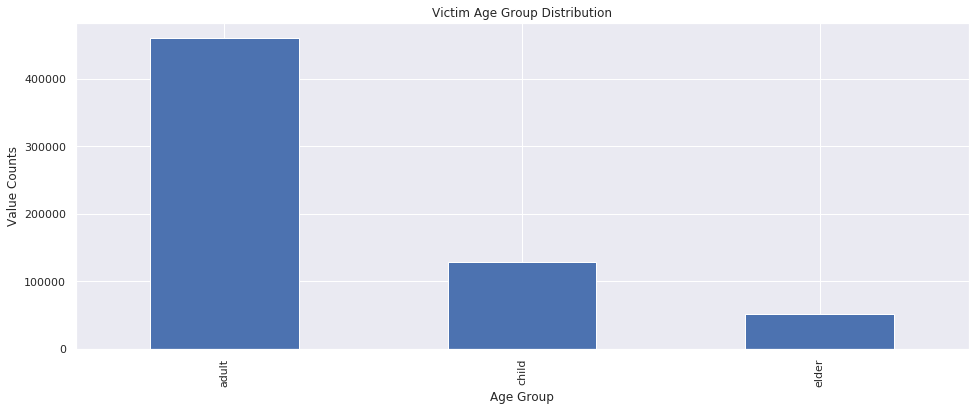

In [65]:
# pick a data frame series, calculate the value counts and plot a bar chart
data3['Victim_Age_Group'].value_counts().plot(kind='bar',figsize=[16,6])
# assign title and labels
plt.title('Victim Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Value Counts')
plt.show()

# 3. Race and Sex
**What perpetrator and victim race has the highest homicide incidences?**<br>
*Perpetrator Race:* Frequency bar chart (catplot) tells us that most race data is unknown (most of the data is linked it to unsolved murders). For African-Americans perpetrator homocide incidences are the highest and comprise of approximetely 25% of the data. African-Americans represent 13% of the US population in 2018. While the experts still debate on the issue they agree on the following. "Concentrated economic disadvantage, poverty, and unemployment have all been found to be predictors of homicide rates." For white perpetrators the percentage is 20% and for Asian/Pacific Islanders 12%.

Quote Source: <https://www.epi.org/blog/racial-inequality-black-homicide-rate/>

*Perpetrator Race:* 25% of all the victims African-Americans. There is less unknown values as if the crime is solved or not its easier to document. White homicide victims represent about 20% of the data. Native American/Alaska native race has the least perpetrators and victims. 


**Code:**<br>
The following seaborn package catplot is displays categorical values on the x axis and numerical values on the y axis. The x and y names are used from the column names in your data source. Then you can choose the type of plot you want (i.e. bar, box...), specify the height with aspect, and use ci=None to remove the significance lines. Hue parameter can also be used to group the chossen x variables into more segments (see the charts below). 
For more information on catplots visit: <https://seaborn.pydata.org/generated/seaborn.catplot.html>

Text(0.5, 8.95999999999998, 'Race')

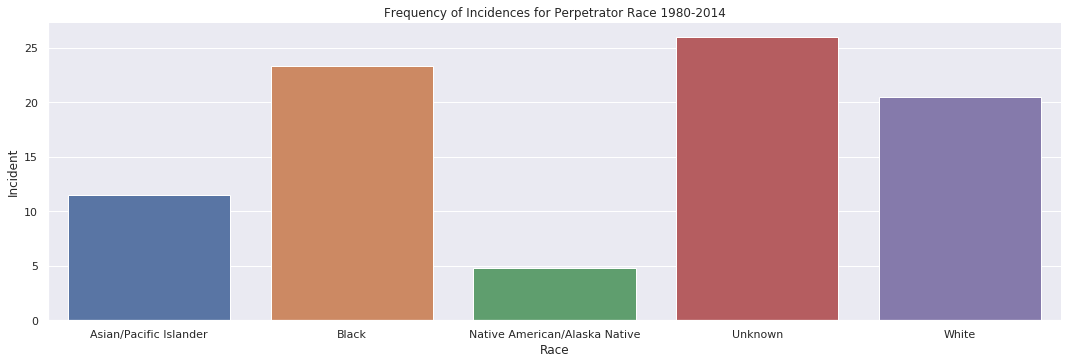

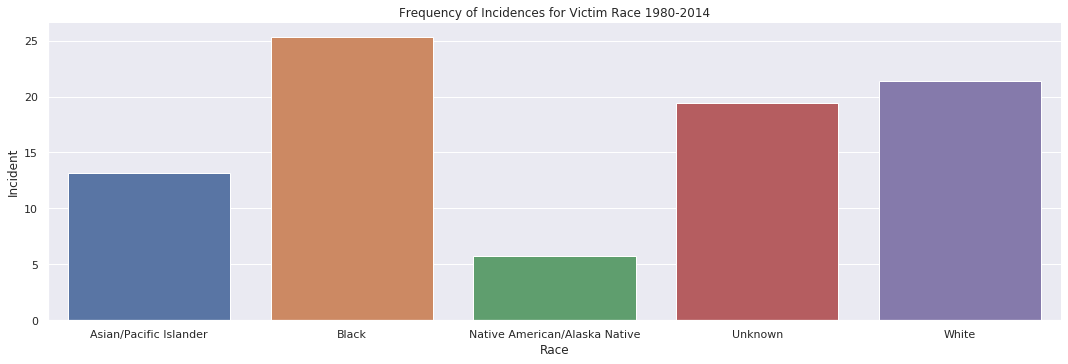

In [66]:
sns.catplot(x='Perpetrator Race',y='Incident',data=data2, kind='bar',aspect=3,ci=None)
plt.title('Frequency of Incidences for Perpetrator Race 1980-2014')
plt.xlabel('Race')
sns.catplot(x='Victim Race',y='Incident',data=data2, kind='bar',aspect=3,ci=None)
plt.title('Frequency of Incidences for Victim Race 1980-2014')
plt.xlabel('Race')

**What is the age group distribution for each race?**<br>
*Perpetrators:* elders age group has the most unknown values for perpetrators (~40%). From which we assume that most unsolved crimes are caused by elders. Likewise, white race has the most elder perpetrators (~30%). Comparing that to the African-Americans most homicides are caused by child (~25%) and then adult (~23-24%) age group. 

*Victims:* Children of all races have the most unknown values which we elaborated when we discussed the infant homicide. Similarly, African-Americans have the highest child homicide rate, then adults, and lastly elders. For whites victims are more likely to be elders, adults and last children. Inequality plays an important role here.

Source: https://www.americanprogress.org/issues/women/reports/2019/05/02/469186/eliminating-racial-disparities-maternal-infant-mortality/

**Catplot:** shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables.

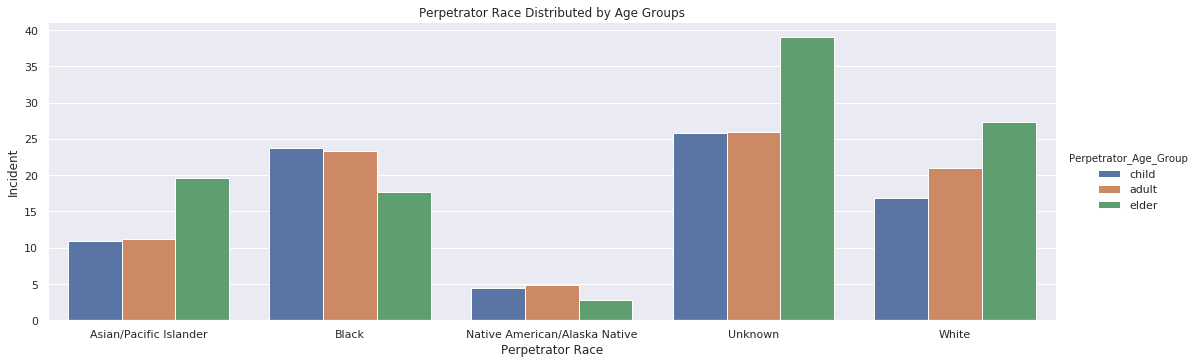

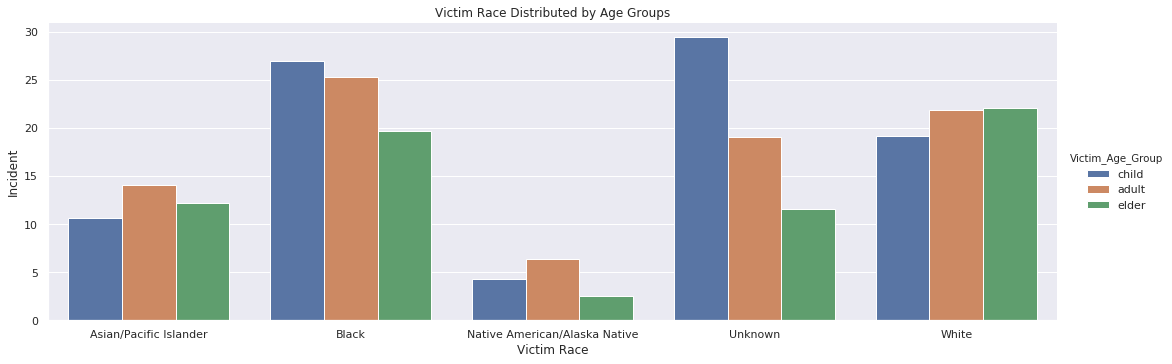

In [67]:
sns.catplot(data=data3,x='Perpetrator Race',y='Incident',hue='Perpetrator_Age_Group',kind='bar',ci=None,aspect=3)
plt.title('Perpetrator Race Distributed by Age Groups')
sns.catplot(data=data3,x='Victim Race',y='Incident',hue='Victim_Age_Group',kind='bar',ci=None,aspect=3)
plt.title('Victim Race Distributed by Age Groups')
plt.show()

**Perpetrator and victim sex distribution for each race?**<br>
*Perpetrator:* White perpetrators have the most unknown values. Remember, we linked most unknown values to unsolved crimes. From that we could assume there would be much more white homicides perhaps more than for the African-American race. Perhaps, the race distribution would be different if we would know the race and age of the unsolved crimes. Whites have more male than female perpetrators for incident frequency (20 and 23 respectively). Similarly, African-Americans, 25 and 17 respectively. Native American/Alaska Native have the same frequency of 5. Lastly, Asian/Pacific Islanders are the only ones that have more female (12) than male perpetrators (11). 

*Victims:* The most striking figure is the amount of African-Americans incident frequency compared to perpetrators (females - 21, males 25, unknown - 31). For whites the incident frequency is comparable (males - 20, females 21, unknown - 10). 

Text(0.5, 25.96, 'Race and Sex')

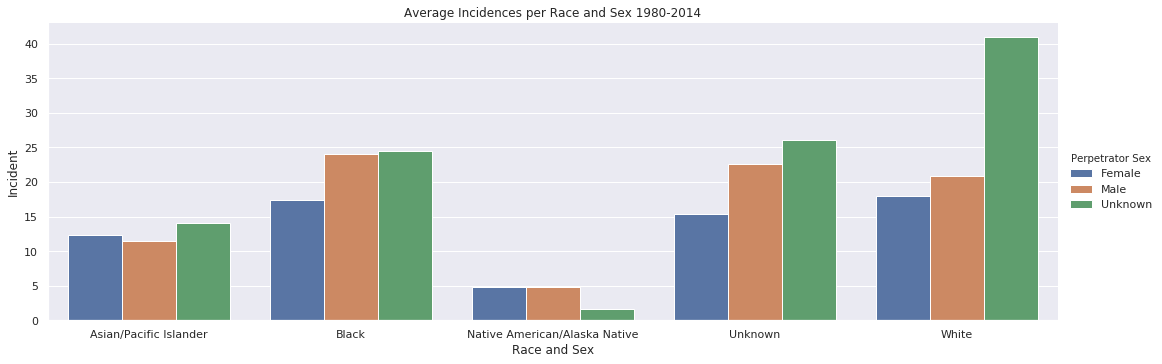

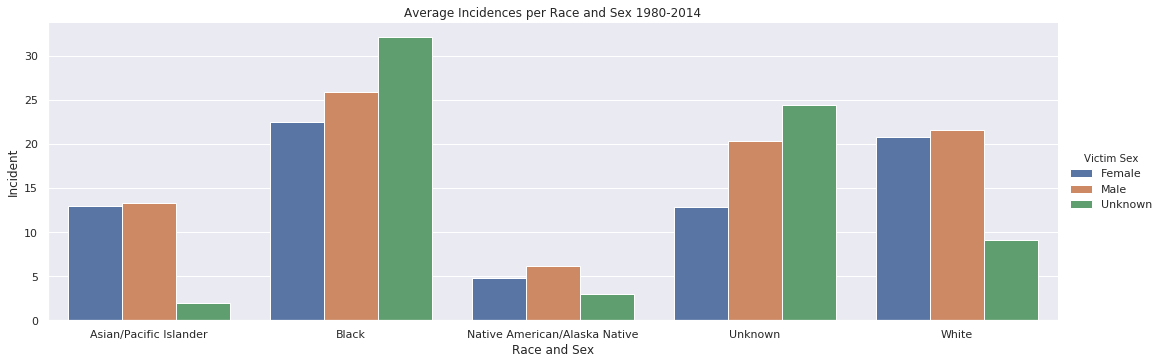

In [68]:
sns.catplot(x='Perpetrator Race',y='Incident',hue='Perpetrator Sex',data=data2, kind='bar',aspect=3,ci=None)
plt.title('Average Incidences per Race and Sex 1980-2014')
plt.xlabel('Race and Sex')
sns.catplot(x='Victim Race',y='Incident',hue='Victim Sex',data=data2, kind='bar',aspect=3,ci=None)
plt.title('Average Incidences per Race and Sex 1980-2014')
plt.xlabel('Race and Sex')

# 4. Relationship

As there are many different relationship values we will group them together in 4 different categories: 
1. Unknown 
    - Contains relationships: Unknown
2. Family (for close family members)
    - Contains relationships: Wife, husband, brother, sister, step-daughter, step-son, son, mother, common-law-husband,
        common-law-wife, step-father, step-momther, daughter, in-law, ex-husband, ex-wife
3. Outer family
    - Contains relationships: Stranger, girlfriend, ex-husband, ex-wife, boyfriend, boyfriend/girlfriend
4. Not family
    - Contains relationships: Neighbor, employee, employer, acquaintance, friend
        
From this we can already see that there are more values available for family and outer family members. 

In [69]:
replace_map_relationship = {'Acquaintance': 'Not family', 'Unknown': 'Unknown', 'Wife': 'Family', 
                                'Stranger': 'Not family','Girlfriend': 'Outer family', 'Ex-Husband': 'Family', 
                                'Brother': 'Family' , 'Stepdaughter': 'Family' , 'Husband': 'Family',
                                'Sister': 'Family','Friend': 'Outer family', 'Neighbor': 'Not family', 
                                'Father': 'Family','In-Law': 'Family', 'Son':'Family',
       'Ex-Wife':'Family', 'Boyfriend':'Outer family', 'Mother':'Family', 'Common-Law Husband':'Family',
       'Common-Law Wife':'Family', 'Stepfather':'Family', 'Stepson':'Family', 'Stepmother':'Family',
       'Daughter':'Family', 'Boyfriend/Girlfriend':'Outer family', 'Employer':'Not family', 'Employee':'Not family'
                                }

data3['relationship_group'] = data['Relationship']
data3['relationship_group'] = data3['relationship_group'].map(replace_map_relationship)

**What relationship group has the most homicides?**<br>
The highest frequency is for the unknown relationship at 38. For the known data family is the most common cause of murder at 16% frequency. Not family comes 3rd at 9%, then outer family at 9%. 

Text(0.5, 8.95999999999998, 'Relationship Groups')

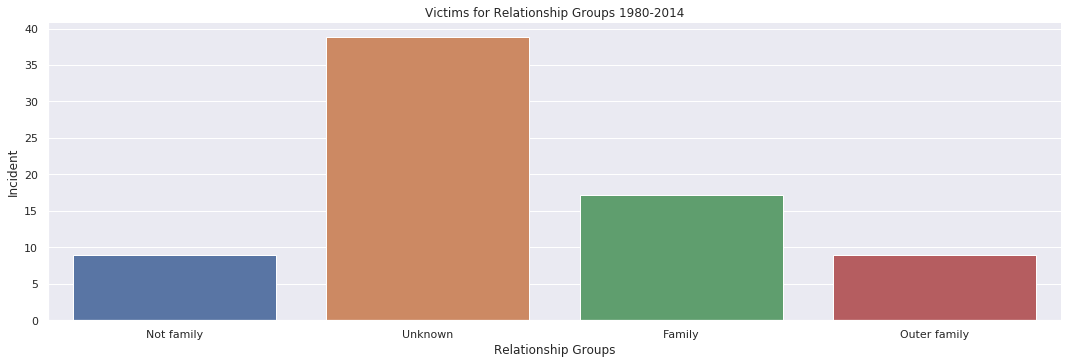

In [70]:
sns.catplot(x='relationship_group',y='Incident',data=data3, kind='bar',aspect=3,ci=None)
plt.title('Victims for Relationship Groups 1980-2014')
plt.xlabel('Relationship Groups')

# 5. Weapon

**What relationship result in most murders from 1980-2014?**<br>
Excluding unknown values, the most common victim relationship that results in murder is acquaintance with 126,018 incidences, then stranger with about 96,593 incidences and the 3rd most commom victim is wife at 23,187 incidences. 

In [71]:
data3['Relationship'].value_counts().head(5)

Unknown         273013
Acquaintance    126018
Stranger         96593
Wife             23187
Friend           21945
Name: Relationship, dtype: int64

Text(0, 0.5, 'Value Counts')

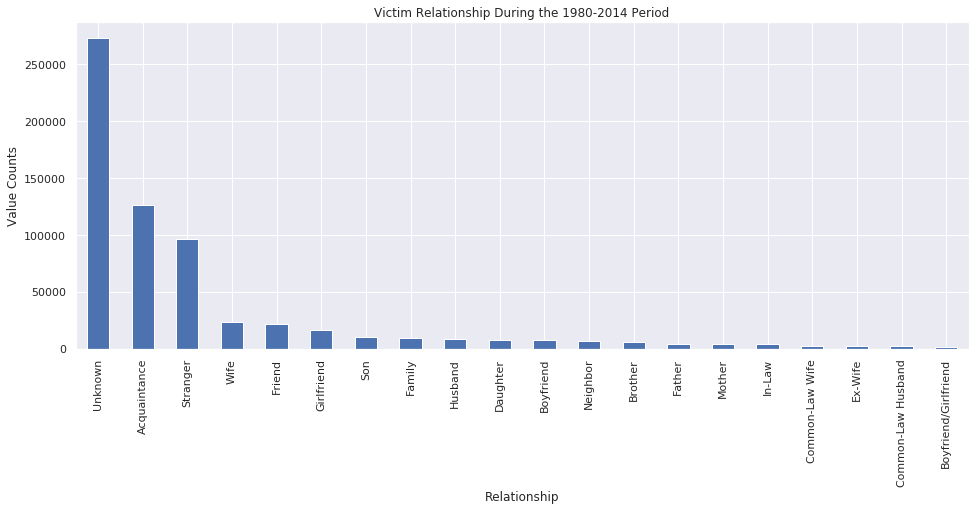

In [72]:
data3['Relationship'].value_counts().head(20).plot(kind='bar',figsize=[16,6])
plt.title('Victim Relationship During the 1980-2014 Period')
plt.xlabel('Relationship')
plt.ylabel('Value Counts')

**What is the most common weapon used in homicides?**<br>
Handgun is the most common weapon by far with, used in 317,484 incidences. Knife comes 2nd at 94,962, and 3rd blunt object at 67,337.

In [73]:
# count the values of the weapon data frame series
data2['Weapon'].value_counts()

Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

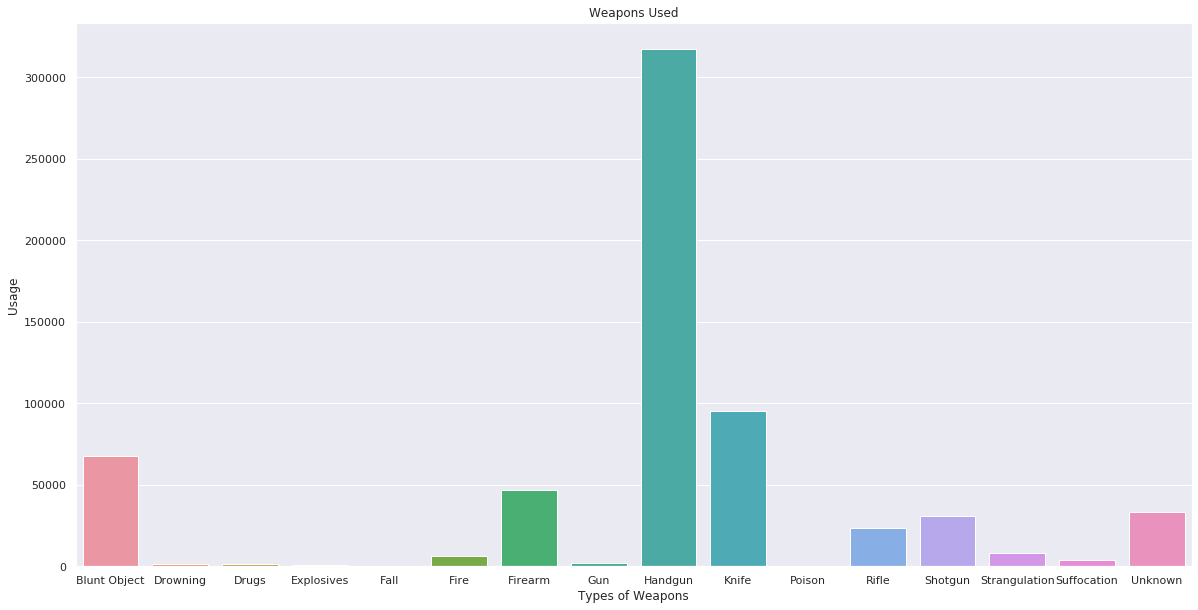

In [74]:
# count the following subplot and specify the chart size
count, ax = plt.subplots(figsize= (20,10))
# create a countplot of that subplot
ax = sns.countplot('Weapon', data=data2)
ax.set_title('Weapons Used')
ax.set_xlabel('Types of Weapons')
ax.set_ylabel('Usage')

plt.show()

# 6. Perpetrator and Victim Count

**Are there more perpetrators than victims?**<br>
No, there are more victims than perpetrators. Perpetrators are more likely to perform a crime on their own. The value counts for 1 perpetrators is 613,583, for 2 is 15,777, and 6,531 for 3. Two victims are the most common in a homicide at 594,215 incidences, then 1 at 38,750, and 2,847 for 3 incidences. 

In [75]:
data2['Perpetrator Count'].value_counts()

1     613583
2      15777
3       6531
4       1489
5        592
6        207
7        129
9         52
8         52
10        42
Name: Perpetrator Count, dtype: int64

In [76]:
data2['Victim Count'].value_counts()

2     594215
1      38750
3       2847
4       1084
5        510
9        290
6        286
7        168
10       160
8        144
Name: Victim Count, dtype: int64

# 7. Data Correlation

**How is the homicide data correlated?**<br>
The biggest correlation is with the year and record ID which does not mean anything. We see that the data is not strongly correlated. The best correlation is between perpetrator and between victim age (26.28%) and incident and year (12.41%).

In [77]:
# apply the correlation calculation to the data
correlation = data2.corr()
correlation

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
Record ID,1.000000,0.997286,0.116943,-0.021884,0.007061,-0.021605,0.052958
Year,0.997286,1.000000,0.124125,-0.019961,0.011815,-0.021993,0.052174
Incident,0.116943,0.124125,1.000000,-0.004408,0.007587,-0.002660,0.004586
Victim Age,-0.021884,-0.019961,-0.004408,1.000000,0.262811,-0.010340,-0.023801
Perpetrator Age,0.007061,0.011815,0.007587,0.262811,1.000000,-0.002866,-0.089503
Victim Count,-0.021605,-0.021993,-0.002660,-0.010340,-0.002866,1.000000,0.017030
Perpetrator Count,0.052958,0.052174,0.004586,-0.023801,-0.089503,0.017030,1.000000


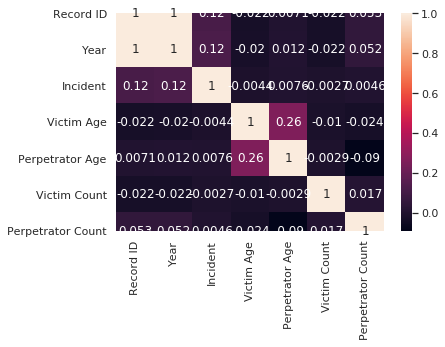

In [78]:
# Viziulize the correlation 
sns.heatmap(correlation,annot=True)

# 8. Decision Tree

# One-Hot encoding
- The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

In [79]:
# create a copy of the clean data
data2_onehot = data2.copy()
# convert category value into an new column and assign it a value
data2_onehot = pd.get_dummies(data2_onehot, columns=['Victim Sex','Victim Race','Relationship'], 
                              prefix = ['Victim Sex','Victim Race','Relationship'])

print(data2_onehot.head())

   Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Relationship_Neighbor  \
0  1980  January         1  Murder or Manslaughter  ...                     0   
1  1980    March         1  Murder or Manslaughter  ...                     0   
2  1980    March         2  Murder or Manslaughter  ...                     0   
3  1980    April         1  Murder or Manslaughter  ...                     0   
4  1980    April         2  Murder or Manslaughter  ...                     0   

   Relationship_Sister Relationship_Son  Relations

In [80]:
# drop the columns we will not use in the decision tree
dec_tree_cols = data2_onehot.drop(columns=['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Weapon', 'Perpetrator Count', 'Record Source'])


In [81]:
# add a target label we want to predict from clean data to the end of the dataframe
dec_tree_cols['Crime Solved'] = data2['Crime Solved']
# Create a dictionary to replace crimes solved with 1 and not solved with 0 
replace_map = {'Yes': 1,'No':0}
# Use the dictionary on a crimes solved column
dec_tree_cols = dec_tree_cols.replace({"Crime Solved": replace_map})
# display first 5 rows
dec_tree_cols.head()

,Victim Age,Victim Count,Victim Sex_Female,Victim Sex_Male,Victim Sex_Unknown,Victim Race_Asian/Pacific Islander,Victim Race_Black,Victim Race_Native American/Alaska Native,Victim Race_Unknown,Victim Race_White,...,Relationship_Sister,Relationship_Son,Relationship_Stepdaughter,Relationship_Stepfather,Relationship_Stepmother,Relationship_Stepson,Relationship_Stranger,Relationship_Unknown,Relationship_Wife,Crime Solved
0,14,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,43,2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,30,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,43,2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,30,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
# Overview of the columns in the data frame
dec_tree_cols.columns

Index(['Victim Age', 'Victim Count', 'Victim Sex_Female', 'Victim Sex_Male',
       'Victim Sex_Unknown', 'Victim Race_Asian/Pacific Islander',
       'Victim Race_Black', 'Victim Race_Native American/Alaska Native',
       'Victim Race_Unknown', 'Victim Race_White', 'Relationship_Acquaintance',
       'Relationship_Boyfriend', 'Relationship_Boyfriend/Girlfriend',
       'Relationship_Brother', 'Relationship_Common-Law Husband',
       'Relationship_Common-Law Wife', 'Relationship_Daughter',
       'Relationship_Employee', 'Relationship_Employer',
       'Relationship_Ex-Husband', 'Relationship_Ex-Wife',
       'Relationship_Family', 'Relationship_Father', 'Relationship_Friend',
       'Relationship_Girlfriend', 'Relationship_Husband',
       'Relationship_In-Law', 'Relationship_Mother', 'Relationship_Neighbor',
       'Relationship_Sister', 'Relationship_Son', 'Relationship_Stepdaughter',
       'Relationship_Stepfather', 'Relationship_Stepmother',
       'Relationship_Stepson', 'Rela

## What is a decision tree?

A **decision tree** is a graph that uses a branching method to illustrate every possible outcome of a decision.

The **value** line in each box is telling us how many samples at that node fall into each category, in order. That's why, in each box, the numbers in value add up to the number shown in sample. For instance, in relationship unknown box, 133180,313737=446917 (number of samples). So this means if you reach this node, there were 133180 data points in category 1, and 313737 in category 2.

**Gini index** or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. 

Each element of the domain of the classification is called a **class**. A decision tree or a classification tree is a tree in which each internal (non-leaf) node is labeled with an input feature. The splitting is based on a set of splitting rules based on classification features.

In [83]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score, classification_report,roc_curve,roc_auc_score #Import scikit-learn metrics module for accuracy calculation

In [84]:
#split dataset in features and target variable
feature_cols = ['Victim Age', 'Victim Count', 'Victim Sex_Female', 'Victim Sex_Male',
       'Victim Sex_Unknown', 'Victim Race_Asian/Pacific Islander',
       'Victim Race_Black', 'Victim Race_Native American/Alaska Native',
       'Victim Race_Unknown', 'Victim Race_White', 'Relationship_Acquaintance',
       'Relationship_Boyfriend', 'Relationship_Boyfriend/Girlfriend',
       'Relationship_Brother', 'Relationship_Common-Law Husband',
       'Relationship_Common-Law Wife', 'Relationship_Daughter',
       'Relationship_Employee', 'Relationship_Employer',
       'Relationship_Ex-Husband', 'Relationship_Ex-Wife',
       'Relationship_Family', 'Relationship_Father', 'Relationship_Friend',
       'Relationship_Girlfriend', 'Relationship_Husband',
       'Relationship_In-Law', 'Relationship_Mother', 'Relationship_Neighbor',
       'Relationship_Sister', 'Relationship_Son', 'Relationship_Stepdaughter',
       'Relationship_Stepfather', 'Relationship_Stepmother',
       'Relationship_Stepson', 'Relationship_Stranger', 'Relationship_Unknown',
       'Relationship_Wife']
X = dec_tree_cols[feature_cols] # Features
y = dec_tree_cols['Crime Solved'] # Target variable

In [85]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

We had to adjust the size of the tree as it was innitially too complicated. So we specified the maximum depth and the maximum number of leaf nodes. The **maximum depth** of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Grow a tree with **max_leaf_nodes** in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [86]:
# Create Decision Tree classifer object
# adjust the model size
clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

The model accuracy is 83.38%. Great! But accuracy can be biased so we will create a confusion matrix.

In [87]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8338232299764536


### Results
Based on the data the model can predict with 66% *accuracy* for when the crime will not be solved and 96% when it will be solved. 

*Recall* tells us, out of all the positive classes, how much we predicted correctly. It should be high as possible. For us the recall to predict whether the victim crime will not be solved is 93%, and 79% when it will be. 

*F-Score:* It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more. For cases that will not be solved is 77% and those which will be is 87%. 

From these we can see that we have a solid model to predict whether the crime will be solved based on the victim data. 

In [88]:
# print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77     57102
           1       0.96      0.79      0.87    134435

    accuracy                           0.83    191537
   macro avg       0.81      0.86      0.82    191537
weighted avg       0.87      0.83      0.84    191537



An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive Rate (trp)
- False Positive Rate (fpr)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

AUC stands for "Area under the ROC Curve. That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

/home/jupyter-ehren/.local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


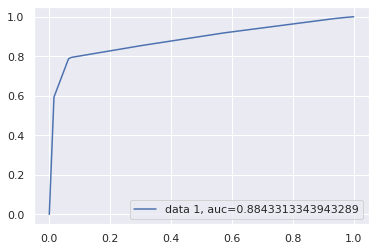

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

What is the value of the area under the roc curve (AUC) to conclude that a classifier is excellent? The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier. 

Our classifier is quite good.

In [90]:
print('False positive rate is: ',fpr)
print('True positive rate is: ',tpr)
print('Receiver operating characteristic curve is: ',auc)

False positive rate is:  [0.         0.01535848 0.06309761 0.06332528 0.0707681  0.07565409
 0.30620644 0.5749711  0.93746279 0.97735631 1.        ]
True positive rate is:  [0.         0.593283   0.78699743 0.78725034 0.79329788 0.79518727
 0.85502287 0.91848105 0.99088779 0.99708409 1.        ]
Receiver operating characteristic curve is:  0.8843313343943289


Here we display the tree, but we need better graphics. So, we will need to use the model called graphviz that will let us display a nice chart. 

[Text(107.61428571428571, 201.90857142857143, 'X[36] <= 0.5\ngini = 0.418\nsamples = 446917\nvalue = [133180, 313737]'),
 Text(47.82857142857143, 170.84571428571428, 'X[35] <= 0.5\ngini = 0.065\nsamples = 256038\nvalue = [8558, 247480]'),
 Text(23.914285714285715, 139.78285714285715, 'gini = 0.022\nsamples = 188213\nvalue = [2053, 186160]'),
 Text(71.74285714285715, 139.78285714285715, 'gini = 0.173\nsamples = 67825\nvalue = [6505, 61320]'),
 Text(167.4, 170.84571428571428, 'X[0] <= 6.5\ngini = 0.453\nsamples = 190879\nvalue = [124622, 66257]'),
 Text(119.57142857142857, 139.78285714285715, 'X[0] <= 0.5\ngini = 0.476\nsamples = 4201\nvalue = [1636, 2565]'),
 Text(95.65714285714286, 108.72, 'gini = 0.499\nsamples = 1282\nvalue = [663, 619]'),
 Text(143.4857142857143, 108.72, 'gini = 0.444\nsamples = 2919\nvalue = [973, 1946]'),
 Text(215.22857142857143, 139.78285714285715, 'X[0] <= 22.5\ngini = 0.45\nsamples = 186678\nvalue = [122986, 63692]'),
 Text(191.31428571428572, 108.72, 'gini = 

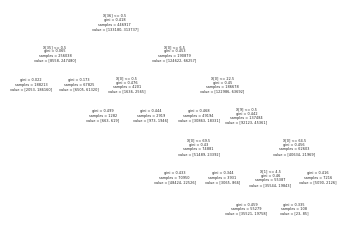

In [91]:
# Display the tree 
plot_tree(clf)

## What have we learned from our decision tree? 
**Question:** Based on the victim data can we predict whether the crime will be solved or not?

Relationship unknown is the most important feature: when relationship unknown is 0 (<= 0.5 as a binary value) and relationship_stranger is 0, more than 90% of the cases are solved or 1. This can be interpreted as if the victim is in a relationship and the partner is not a stranger, the cases are mostly solved. Moreover, if the victim age is not below 6.5 most crimes will be solved. If the victim is above age 22.5 and victim is white more then 60% of the crimes we solved. Meaning, whites have most unsolved crimes. For this we would need to conduct more research to support this hypothesis. 

When relationship_unknown is bigger than <= 0.5 and victim age is victim_age is 0, more than 65% of cases will not be solved. This can be interpreted as if the victim is 0 the cases are mostly unsolved. 

**export_graphviz** function converts decision tree classifier into dot file and **pydotplus** convert this dot file to png or displayable form on Jupyter.

In [92]:
import graphviz # lets us display the tree in jupiter
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/home/jupyter-ehren/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


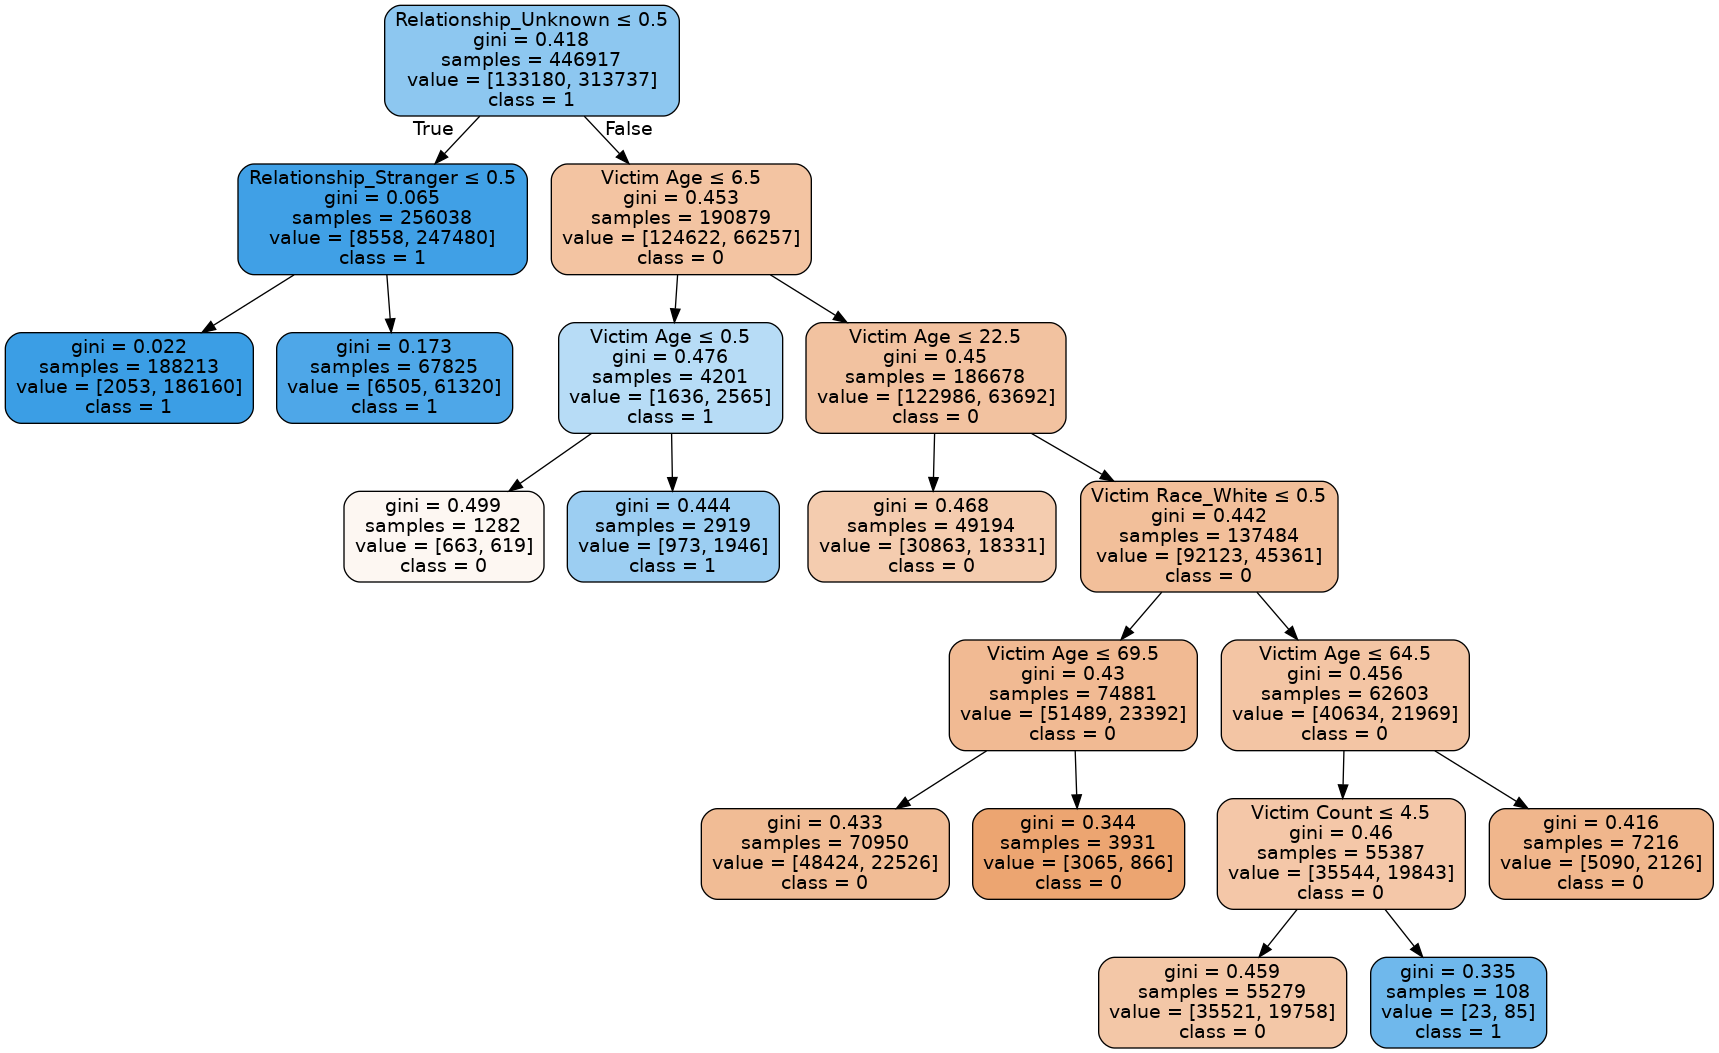

In [93]:
# StringIO() --> Read and write strings as files
# save it in a variable 
dot_data = StringIO()
# write clf data into a file, out_file = use StringIO() function
# filled = when true paint nodes to indicate majority class for classification, extremity of values for regression,
    # or purity of node for multi-output 
# Rounded = When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman
# When set to True, do not ignore special characters for PostScript compatibility
# feature_names = Names of each of the features (0 and 1 for us)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# convert file to png 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# specify the name of the png file
graph.write_png('./crime_solved.png')
# display the decision tree in jupiter 
Image(graph.create_png())

# 9. Reducing Crime in Hartford, CT
## Is it by increasing funding of to the police or education?

# Argument for Education

### According to the study, "Saving Futures, Saving Dollars: The Impact of Education on Crime Reduction and Earnings" by Alliance for Center of Education 2013

The most recent research available from the Bureau of Justice Statistics indicates that 67 percent of inmates in America’s state prisons, 56 percent of federal inmates, and 69 percent of inmates in local jails did not complete high school.

Increasing the number of students who graduate from high school and eventually complete a postsecondary degree would create significant benefits for individuals, communities, states, and the nation as a whole. The demonstrated benefits include increased lifetime earnings and tax revenues, increased purchases such as homes and cars, and lower unemployment rates.

The benefits also relate to improvements in quality of life such as decreased crime and incarceration rates and improved health conditions and outcomes. The Alliance for Excellent Education (the Alliance) estimates that a 5 percentage point increase in the national high school graduation rate for male students alone would save the nation an overwhelming $19.7$
billion annually. The nation’s fiscal priorities need to be reversed when it comes to education and crime. Consider that the national average for educating a student is $12,643$ per year while the annual state average cost to house an inmate is more than double that amount, at $28,323$. In 2007, the federal government spent nearly $37$ billion on justice-related expenditures while in the following year Title I grants to school districts from the Elementary and Secondary Education Act, the largest federal investment in K–12 education, amounted to $14$ billion.

Hartford is one of the most dangerous cities in CT. It's not clear why gangs thrive in Connecticut, but research has shown crime is more prevalent in areas with high income gaps. And Connecticut has the starkest contrast between the rich and the poor, according to Census data analyzed by Bloomberg.

In [94]:
# Subset the data for Hartford
hartford_subset = data2[data2['City'] == 'Hartford']

## Perpetrator Age Distribution

Most homicide incidences for Hartford happen during the summer months. Compared to national homicie incidences september and december are a bit ower on a scale but still in the top 5. That means that besides the head in the summermonths there are some oter factors that contribute to more murders towards the end of th year when te weather is cold. Therefore, education and others should focus on these months by introducing programs to reduce murders. Moreover, find specifc reasons behind why there are more murders in september and december. Our assumption is the holiday season where everyone is mostly with their family, and many robbings happend durring that time period tht could result in that. Fr instance, te christmas period has the highest burglary rate.
Source: https://www.netatmo.com/blog/en/security/christmas-the-season-to-be-burgled/

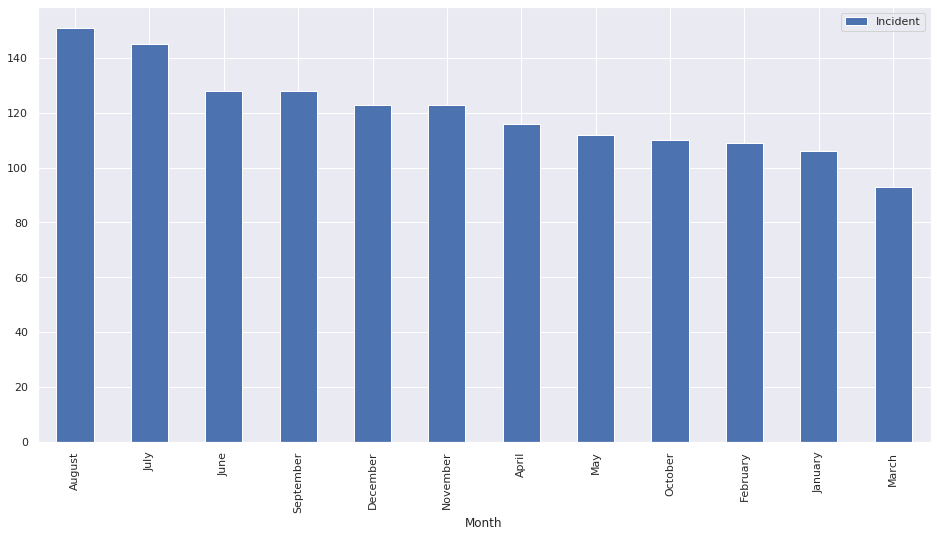

In [121]:
hartfort_month = hartford_subset.groupby('Month')['Incident'].agg('count').reset_index().sort_values('Incident',ascending=False)
hartfort_month.plot(x='Month',y='Incident',kind='bar',figsize=[16,8])

From these distribution we see that the Hartfort perpetratr age is actualy older compared to the national count. 

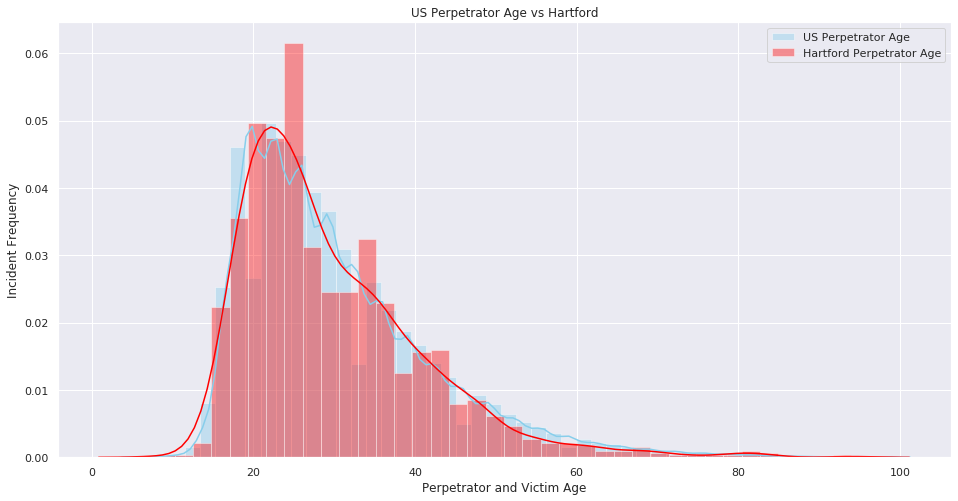

In [96]:
plt.subplots(figsize=(16, 8))
sns.distplot( data2["Perpetrator Age"] , color="skyblue", label="US Perpetrator Age")
sns.distplot( hartford_subset["Perpetrator Age"] , color="red", label="Hartford Perpetrator Age")
plt.title('US Perpetrator Age vs Hartford')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

For Hartford the victim and perpetrator age actually got older. In the eighties the most frequent perpetrator age was 21 and for victims 22. From 2009 - 2014 time period the age increased to 26 and 24, respectively. Our assumptions that would require more research is that the North East region has a higher stadard of living. 

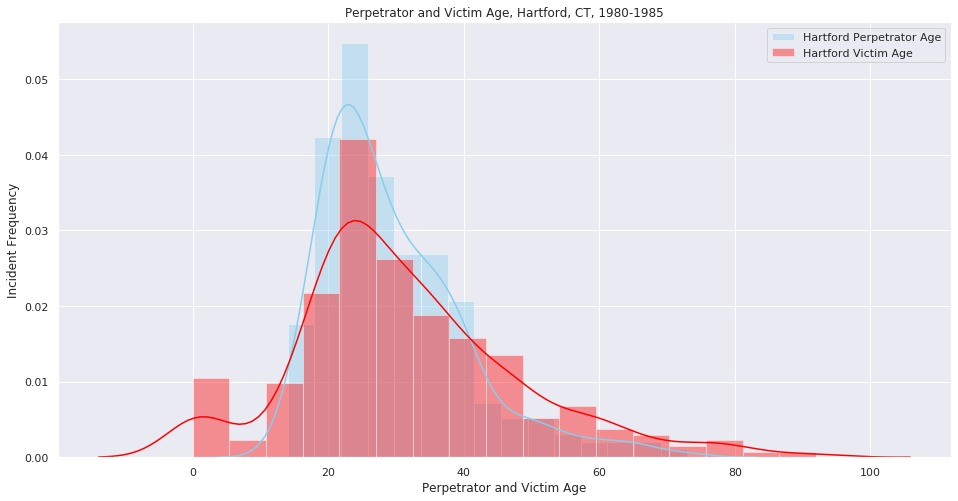

In [97]:
# subset data for the 1980-1985 years
eighties2 = hartford_subset[hartford_subset['Year']<=1985]

# subset data for the 2009-2014 years 
modern2 = hartford_subset[hartford_subset["Year"]>=2009] 

plt.subplots(figsize=(16, 8))
sns.distplot( eighties2["Perpetrator Age"] , color="skyblue", label="Hartford Perpetrator Age")
sns.distplot( eighties2["Victim Age"] , color="red", label="Hartford Victim Age")
plt.title('Perpetrator and Victim Age, Hartford, CT, 1980-1985')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

In [98]:
mode_eighties2 = eighties2["Perpetrator Age"].mode()
print("Most frequent perpetrator age for years 1980-1985: ",mode_eighties2,'\n')
mode_eighties_perp2 = eighties2["Victim Age"].mode()
print("Most frequent victim age for years 1980-1985: ",mode_eighties_perp2,'\n')
print('Perpetrator age describe: ',eighties2["Perpetrator Age"].describe(),'\n')
print('Perpetrator age describe: ',eighties2["Victim Age"].describe())

Most frequent perpetrator age for years 1980-1985:  0    21
dtype: int64 

Most frequent victim age for years 1980-1985:  0    22
1    24
dtype: int64 

Perpetrator age describe:  count    246.000000
mean      29.540650
std       10.678052
min       14.000000
25%       22.000000
50%       27.000000
75%       35.000000
max       73.000000
Name: Perpetrator Age, dtype: float64 

Perpetrator age describe:  count    246.000000
mean      31.581301
std       16.553423
min        0.000000
25%       22.000000
50%       29.000000
75%       39.750000
max       92.000000
Name: Victim Age, dtype: float64


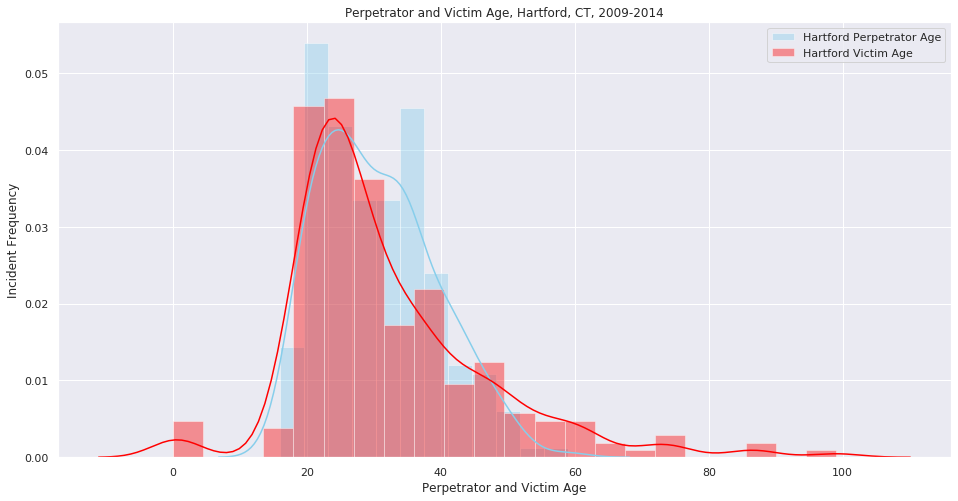

In [99]:
plt.subplots(figsize=(16, 8))
sns.distplot( modern2["Perpetrator Age"] , color="skyblue", label="Hartford Perpetrator Age")
sns.distplot( modern2["Victim Age"] , color="red", label="Hartford Victim Age")
plt.title('Perpetrator and Victim Age, Hartford, CT, 2009-2014')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

In [100]:
mode_modern2 = modern2["Perpetrator Age"].mode()
print("Most frequent perpetrator age for years 2009-2014: ",mode_modern2,'\n')
mode_modern_perp2 = modern2["Victim Age"].mode()
print("Most frequent victim age for years 2009-2014: ",mode_modern_perp2,'\n')
print('Perpetrator age describe: ',modern2["Perpetrator Age"].describe(),'\n')
print('Victim age describe: ',modern2["Victim Age"].describe())

Most frequent perpetrator age for years 2009-2014:  0    26
dtype: int64 

Most frequent victim age for years 2009-2014:  0    24
dtype: int64 

Perpetrator age describe:  count    233.000000
mean      30.557940
std        8.586143
min       16.000000
25%       24.000000
50%       29.000000
75%       36.000000
max       59.000000
Name: Perpetrator Age, dtype: float64 

Victim age describe:  count    233.000000
mean      31.815451
std       14.553271
min        0.000000
25%       23.000000
50%       28.000000
75%       37.000000
max       99.000000
Name: Victim Age, dtype: float64


The streets of Hartford are infested with thousands of gang members, according to an internal memorandum circulating through the Hartford Police Department. Which explains why most victim perptrator relationships homicide are not family members. 

Source: https://www.nbcconnecticut.com/news/local/gang-infestation-in-hartford/1875098/

Text(0.5, 8.95999999999998, 'Relationship Groups')

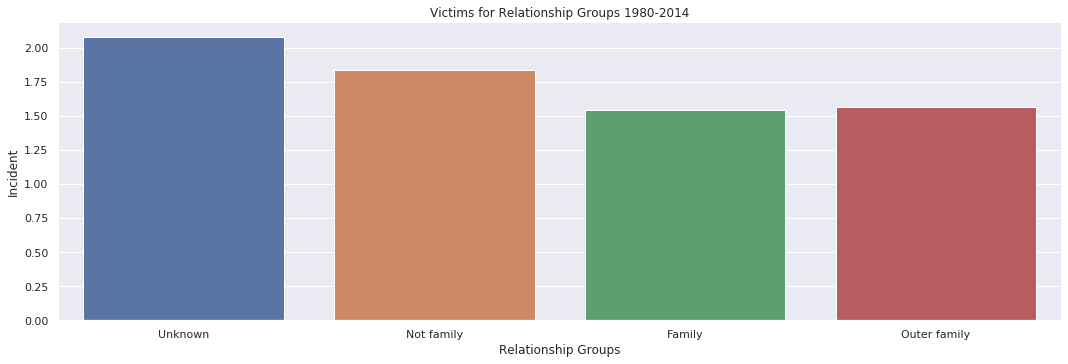

In [101]:
hartford = hartford_subset.copy()

replace_map_relationship2 = {'Acquaintance': 'Not family', 'Unknown': 'Unknown', 'Wife': 'Family', 
                                'Stranger': 'Not family','Girlfriend': 'Outer family', 'Ex-Husband': 'Family', 
                                'Brother': 'Family' , 'Stepdaughter': 'Family' , 'Husband': 'Family',
                                'Sister': 'Family','Friend': 'Outer family', 'Neighbor': 'Not family', 
                                'Father': 'Family','In-Law': 'Family', 'Son':'Family',
       'Ex-Wife':'Family', 'Boyfriend':'Outer family', 'Mother':'Family', 'Common-Law Husband':'Family',
       'Common-Law Wife':'Family', 'Stepfather':'Family', 'Stepson':'Family', 'Stepmother':'Family',
       'Daughter':'Family', 'Boyfriend/Girlfriend':'Outer family', 'Employer':'Not family', 'Employee':'Not family'
                                }

hartford['relationship_group'] = data2['Relationship']
hartford['relationship_group'] = hartford['relationship_group'].map(replace_map_relationship2)

sns.catplot(x='relationship_group',y='Incident',data=hartford, kind='bar',aspect=3,ci=None)
plt.title('Victims for Relationship Groups 1980-2014')
plt.xlabel('Relationship Groups')

Here is the further proof of that. 

Text(0, 0.5, 'Value Counts')

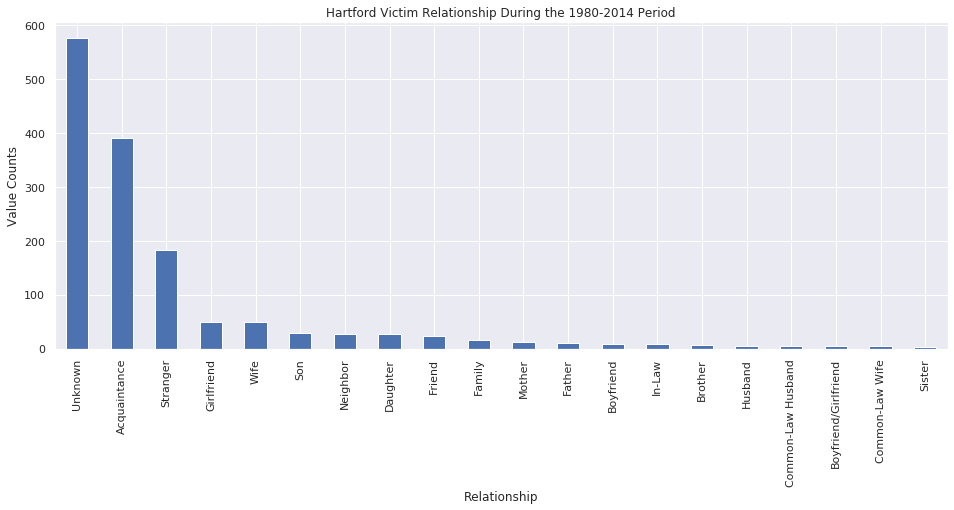

In [102]:
hartford['Relationship'].value_counts().head(20).plot(kind='bar',figsize=[16,6])
plt.title('Hartford Victim Relationship During the 1980-2014 Period')
plt.xlabel('Relationship')
plt.ylabel('Value Counts')

Most of the perpetrators and victims in Hartford are males by far which further supports the point of gang violance. Moreover, for males there are more victims than there are perpetrators. For females is the opposite. It would be interesting to see why is that as a good next step.

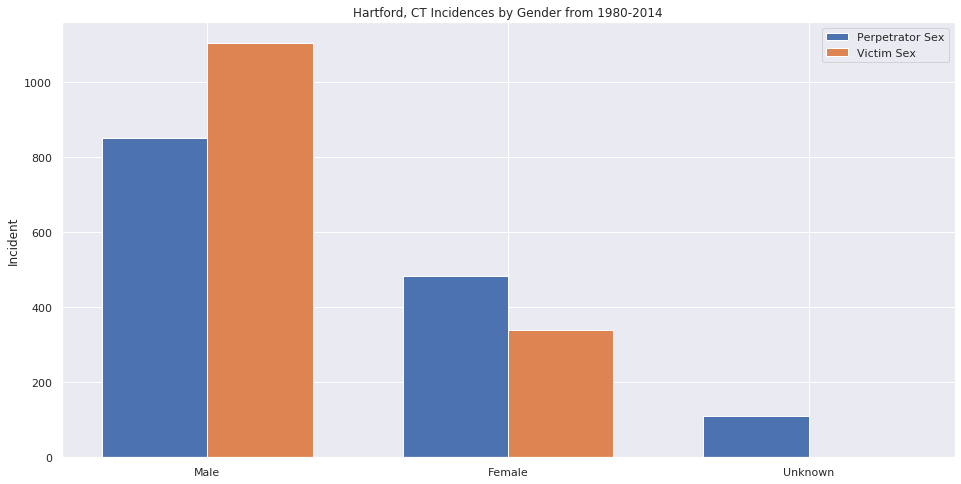

In [122]:
import numpy as np

#finds perpetrator count of men and women 
hartford_subset_malevsfemale_p = hartford_subset.groupby('Perpetrator Sex')['Incident'].agg('count')
hartford_subset_malevsfemale_p = hartford_subset_malevsfemale_p.reset_index().sort_values('Incident',ascending=False)
hartford_subset_malevsfemale_v = hartford_subset.groupby('Victim Sex')['Incident'].agg('count')
hartford_subset_malevsfemale_v = hartford_subset_malevsfemale_v.reset_index().sort_values('Incident',ascending=False)

plt.subplots(figsize=(16, 8))
N = 3
perp_sex = hartford_subset_malevsfemale_p['Incident']
women_sex = hartford_subset_malevsfemale_v['Incident']

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, perp_sex, width, label='Perpetrator Sex')
plt.bar(ind + width, women_sex, width,
    label='Victim Sex')

plt.ylabel('Incident')
plt.title('Hartford, CT Incidences by Gender from 1980-2014')

plt.xticks(ind + width / 2, ('Male', 'Female', 'Unknown'))
plt.legend(loc='best')
plt.show()

# Argument for Police Budget Increase
Our use of the funds will help deter crime in the quickest way possible- by adding much needed officers to patrol our city. There are studies by the nonprofit RAND Corporation that shows adding more officers into a city prevents crime by over 5%. That might not seem like much, but those are real results you can see very soon after funding. We want our citizens to feel safe in their homes and feel comforted that they can call on us at anytime without delay.  

However, our use of the funding will not just be used for increased police presence, half of the money will be used to fund a new program at Hartford County Prison to offer prisoners a chance to receive a college degree. 95% of criminals convicted of violent crimes, including homicide, will be released. The program offers inmates the chance to take college-level classes and eventually earn a full bachelor's degree from one of our state schools.   This type of program has been used successfully by Bedford Hills Prison in New York and has shown to lower recidivism rates by close to 95%. If an inmate just takes 1 college class their chance of returning is drastically reduced. A IHEP (Institute of Higher Education Policy)  report cites yet higher numbers, reporting that recidivism rates for incarcerated people who had participated in prison education programs were on average 46 percent lower than the rates of incarcerated people who had not taken college classes.

- We want to take a 2-step approach to reduce crime:

Deter crime by adding more police patrols in the community. These officers will work with community leaders to build trust in the department by offering regular community meetings and events.
Begin a new college-level program within Hartford County Prison where prisoners can earn a valuable degree so they can gain meaningful employment after release. 

We firmly believe this approach will help lower violent crimes now and in the future. The evidence of success for this approach is clear and we trust you will make the right decision by providing our department with the funding. 


The Hartford incidences appear to be again in the upward trend towards the end of 2014. Morever, wee see that the crack epidemic, its decrease (from government crack downs) and financial crisis does have an effect on homicide incidences. 

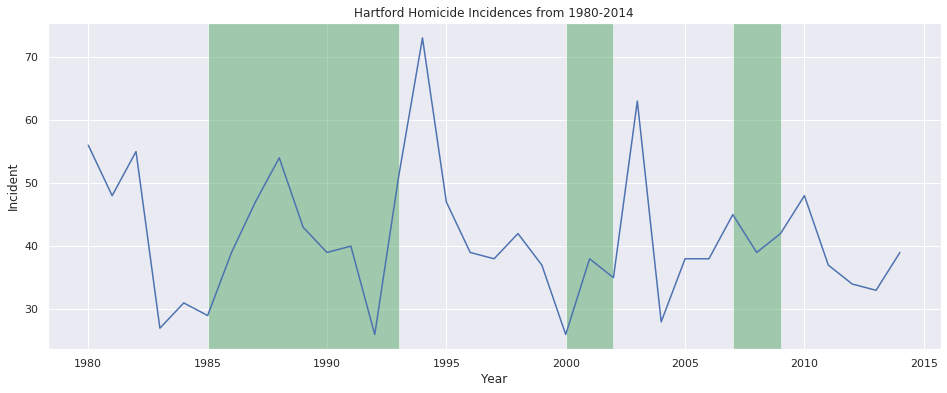

In [104]:
# Group the count of incident by year 
# Reset index for plotting
hartford_incidences = hartford_subset.groupby('Year')['Incident'].agg('count')
hartford_incidences = hartford_incidences.reset_index()

# Create a lineplot over for all the years of data
plt.figure(figsize=(16, 6))
sns.lineplot(data=hartford_incidences, x='Year',y='Incident').set_title("Hartford Homicide Incidences from 1980-2014")

# mark the financial crises on the graph
plt.axvspan(2000,2002,facecolor='g', alpha=0.5)
plt.axvspan(2007,2009,facecolor='g', alpha=0.5)
plt.axvspan(1985,1993,facecolor='g', alpha=0.5)

Further display for homicide incidences over the years. 

Text(0, 0.5, 'Incident Count')

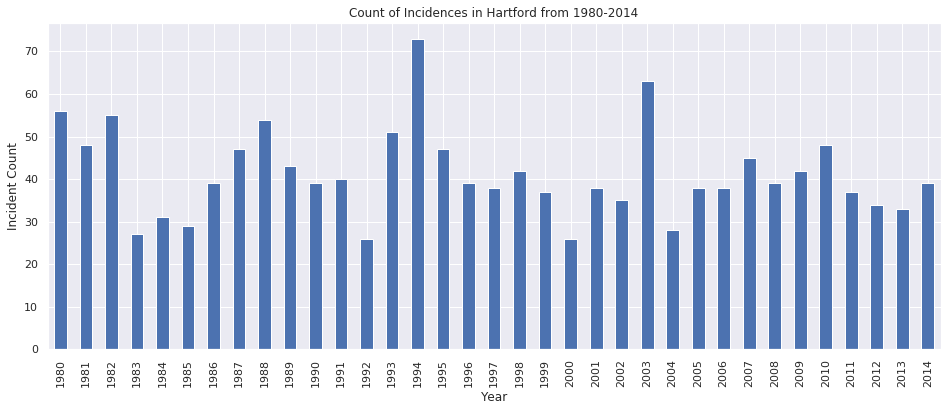

In [105]:
hartford_subset.groupby('Year')['Incident'].agg('count').plot(kind='bar',figsize=[16,6])
plt.title('Count of Incidences in Hartford from 1980-2014')
plt.ylabel('Incident Count')

Almost half of the crimes in Hartford were not solved which means that there is problems with executing the sentences in court or in with te police department. 

Text(0, 0.5, 'Count')

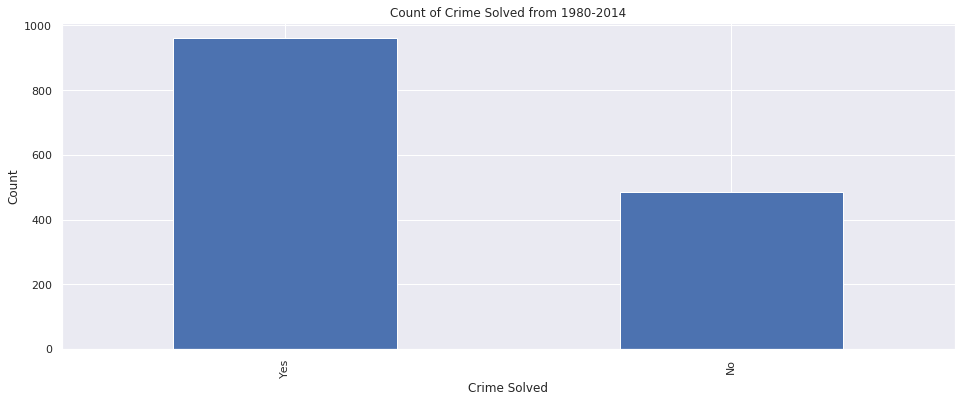

In [106]:
hartford_subset['Crime Solved'].value_counts().plot(kind='bar',figsize=[16,6])
plt.title('Count of Crime Solved from 1980-2014')
plt.xlabel('Crime Solved')
plt.ylabel('Count')

Most of the homicides are commited by firearm by far. 

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


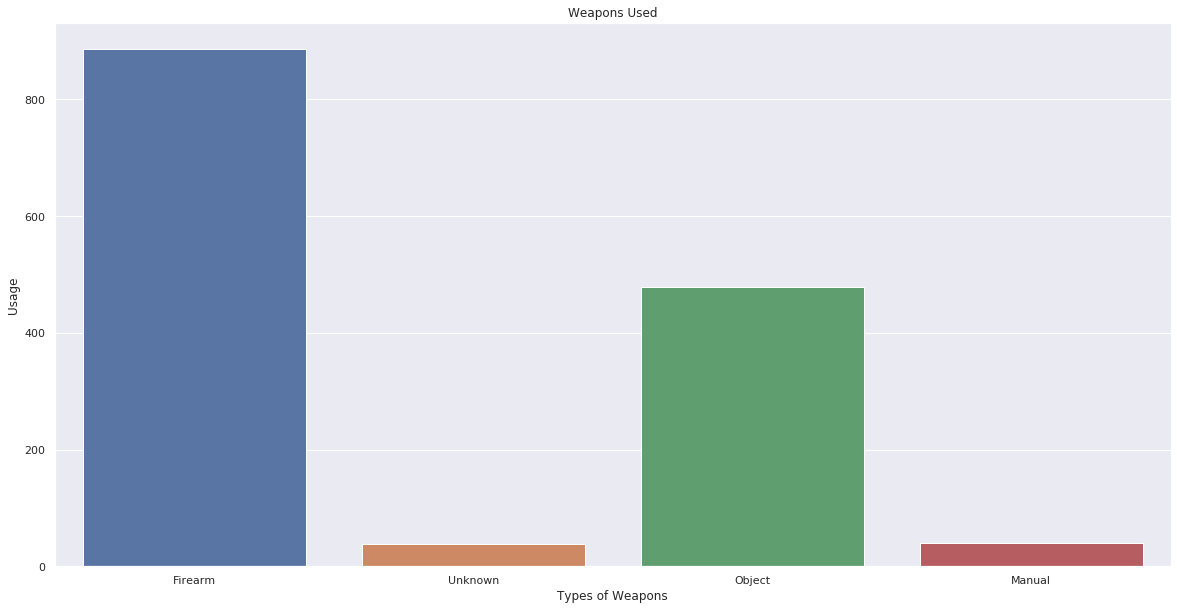

In [107]:
replace_map_weapon2 = {'Blunt Object': 'Object', 'Unknown': 'Unknown', 'Strangulation': 'Manual', 
                                'Rifle': 'Firearm','Knife': 'Object', 'Firearm': 'Firearm', 
                                'Shotgun': 'Firearm' , 'Fall': 'Manual' , 'Handgun': 'Firearm',
                                'Drowning':'Manual','Suffocation':'Manual','Explosives':'Object',
                                'Fire':'Object','Drugs':'Object','Gun':'Firearm','Poison':'Object'}

hartford_subset['weapon_group'] = data2['Weapon']
hartford_subset['weapon_group'] = hartford_subset['weapon_group'].map(replace_map_weapon2)

# count the following subplot and specify the chart size
count, ax = plt.subplots(figsize= (20,10))
# create a countplot of that subplot
ax = sns.countplot('weapon_group', data=hartford_subset)
ax.set_title('Weapons Used')
ax.set_xlabel('Types of Weapons')
ax.set_ylabel('Usage')

plt.show()

## NEXT STEPS 

We found many interesting things through this extensive data exloration. Our next goal is to gather the most interesting and relavent topics today and perform deeper analysis. To try to predict the root cause of the issue and remedies by implementing machine and other classification/predictive models. 

I hope you found it interesting! 